# **HMM CODES**

### **Latest Version :**

In [1]:
# @title Install
!pip install hmmlearn
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.3 MB/s eta 0:00:00


seq: WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNIIIIIIIIIIITTTTTTTTTTTT

<ipython-input-58-c788a6af8ef5>:61: RuntimeWarning: invalid value encountered in divide
  transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)


Number of transitions between states: 113



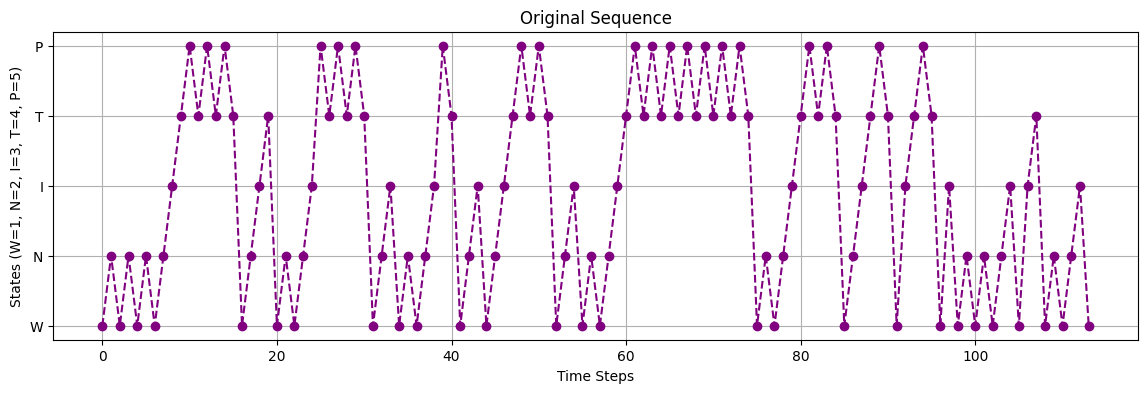

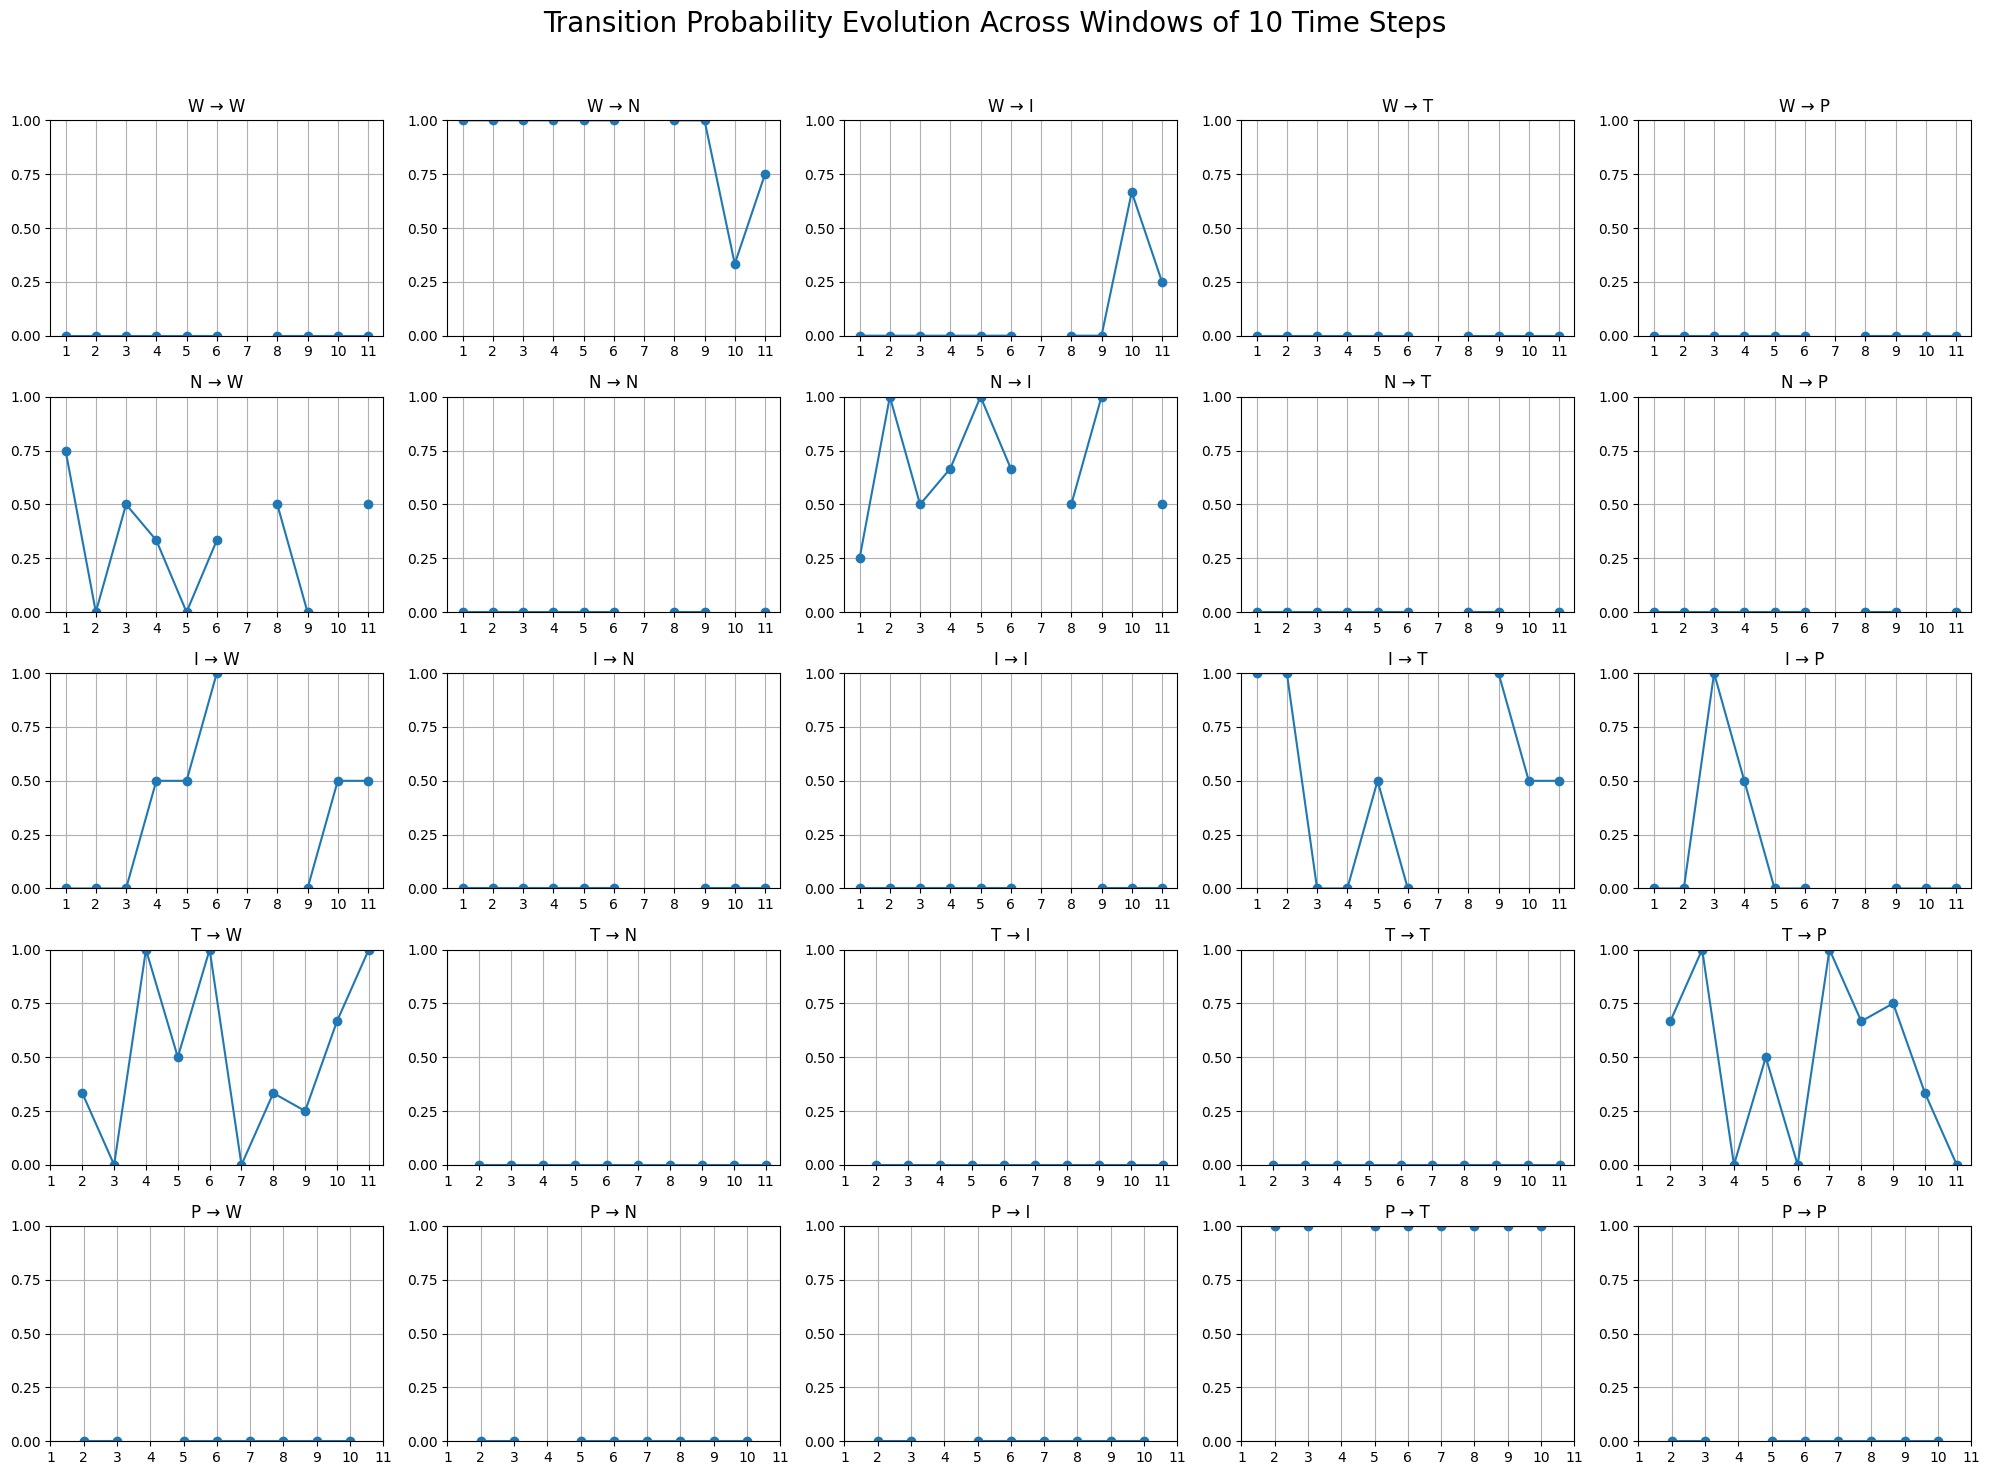

In [58]:
# @title transitions overtime (Week 9)
"""
10 seconds windows

"""

#!pip install hmmlearn
#!pip install graphviz

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from graphviz import Digraph
import seaborn as sns
import pandas as pd

def convert_sequence(sequence):
    filtered_sequence = [sequence[0]] + [sequence[i] for i in range(1, len(sequence)) if sequence[i] != sequence[i - 1]]
    #filtered_sequence = input_sequence #turn on if you want to enable state to itself transitions
    return [1 if char == 'W' else
            2 if char == 'N' else
            3 if char == 'I' else
            4 if char == 'T' else
            5 if char == 'P' else
            1 if char == 1 else
            2 if char == 2 else
            3 if char == 3 else
            4 if char == 4 else
            5 if char == 5 else
            None for char in filtered_sequence]


input_sequence = input("seq: ")
original_sequence = convert_sequence(input_sequence)
original_sequence = [value for value in original_sequence if value is not None]
original_sequence = convert_sequence(original_sequence)

n_states = 5
time_step_window = 10  # WINDOW SIZE

# NUMBER OF TRANSITIONS
transitions = 0
for i in range(1, len(original_sequence)):
    if original_sequence[i] != original_sequence[i - 1]:
        transitions += 1

# Calculate Transition Matrices for Each 10-Time-Step Window
transition_matrices = []
num_windows = len(original_sequence) // time_step_window

for w in range(num_windows):
    window_sequence = original_sequence[w * time_step_window:(w + 1) * time_step_window]
    transition_matrix = np.zeros((n_states, n_states))

    for (current_state, next_state) in zip(window_sequence[:-1], window_sequence[1:]):
        transition_matrix[current_state - 1, next_state - 1] += 1
    # Normalize transition matrix
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)
    transition_matrices.append(transition_matrix)

# OUTPUTS ----------------------------------------------------------------------

print(f"Number of transitions between states: {transitions}")
print("")
plt.figure(figsize=(14, 4))
plt.plot(original_sequence, color='purple', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("States (W=1, N=2, I=3, T=4, P=5)")
plt.yticks([1, 2, 3, 4, 5], labels=['W', 'N', 'I', 'T', 'P'])
plt.grid(True)
plt.show()
print("")

# Plot Transition Probability Evolution
state_labels = ['W', 'N', 'I', 'T', 'P']
fig, axes = plt.subplots(n_states, n_states, figsize=(20, 15))

for i in range(n_states):
    for j in range(n_states):
        probabilities = [matrix[i, j] for matrix in transition_matrices]
        axes[i, j].plot(range(1, num_windows + 1), probabilities, marker='o', linestyle='-')
        axes[i, j].set_title(f'{state_labels[i]} → {state_labels[j]}')
        axes[i, j].set_ylim(0, 1)
        axes[i, j].grid(True)
        axes[i, j].set_xticks(range(1, num_windows + 1))  # Set x-axis ticks
        axes[i, j].set_yticks(np.linspace(0, 1, 5))

fig.suptitle('Transition Probability Evolution Across Windows of 10 Time Steps', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **Other Versions :**

seq: WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Filtered sequence: [1, 2, 1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 1, 2, 3, 4, 5, 4, 1, 2]
Iteration 1: 90.00%
Iteration 2: 90.00%
Iteration 3: 100.00%

Training stopped at 3 iterations.

Accuracy (max. reached by predicted sequence): 100.00%
Number of transitions between states: 19



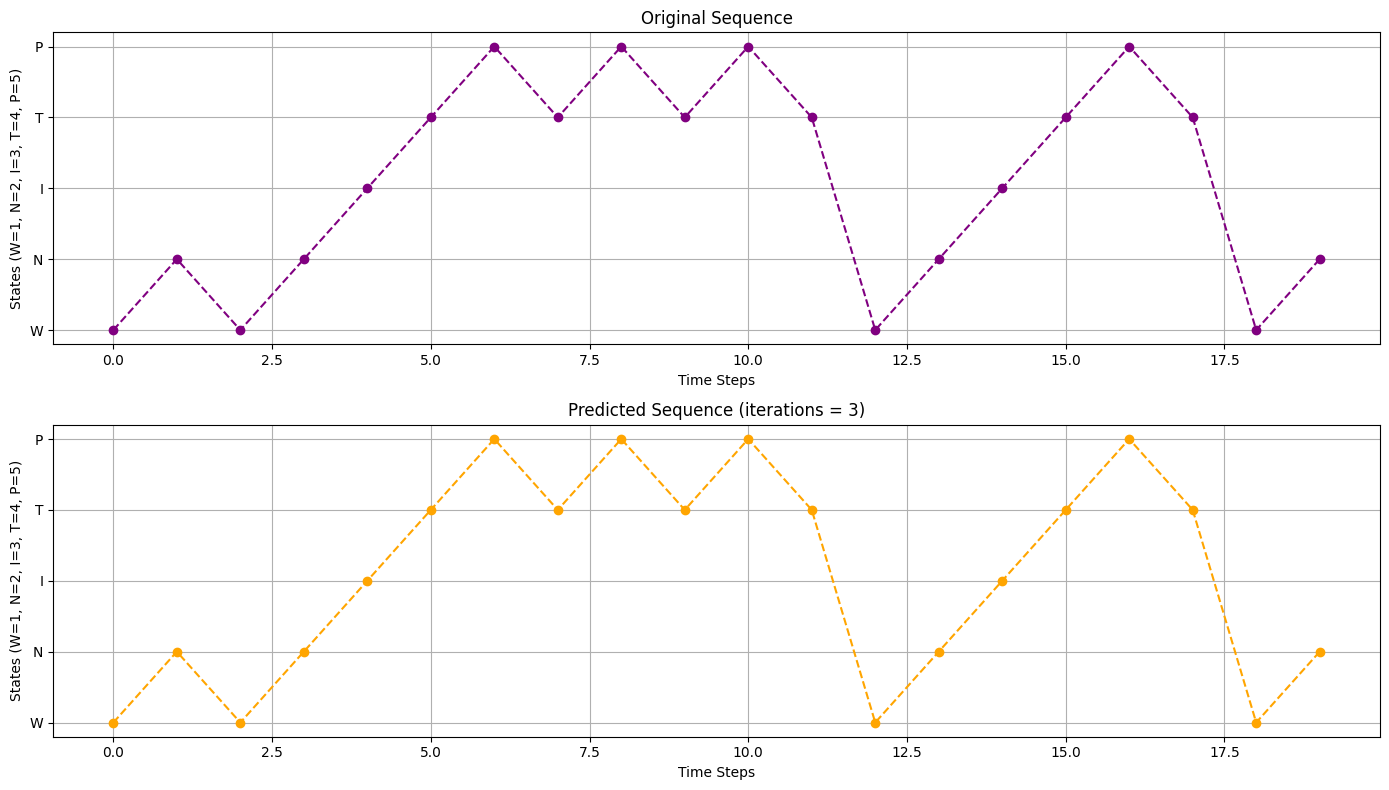


TRANSITION PROBABILITIES:
W → W: 0.0000
W → N: 1.0000
W → I: 0.0000
W → T: 0.0000
W → P: 0.0000
N → W: 0.3333
N → N: 0.0000
N → I: 0.6667
N → T: 0.0000
N → P: 0.0000
I → W: 0.0000
I → N: 0.0000
I → I: 0.0000
I → T: 1.0000
I → P: 0.0000
T → W: 0.3333
T → N: 0.0000
T → I: 0.0000
T → T: 0.0000
T → P: 0.6667
P → W: 0.0000
P → N: 0.0000
P → I: 0.0000
P → T: 1.0000
P → P: 0.0000



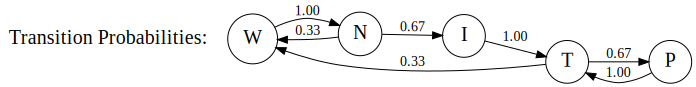

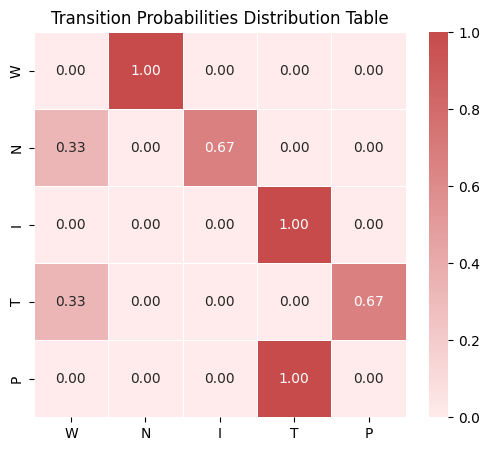

In [27]:
# @title whole table all states (week 8)
"""
To setup the HMM model :
- change n_states to the number of hidden states in the sequence
- in the EMISSION MATRIX init. adjust its randomness by changing the
  multiplication coefficient (*1.421 in this specific case)
- adjust the MAXIMUM number of iterations max_iterations if necessary

Run the !pip install lines the first time to install the libraries

"""

#!pip install hmmlearn
#!pip install graphviz

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from graphviz import Digraph
import seaborn as sns
import pandas as pd

# ORIGINAL SEQUENCES -----------------------------------------------------------

def convert_sequence(sequence):
    # Create a filtered sequence that removes consecutive duplicates
    filtered_sequence = [sequence[0]] + [sequence[i] for i in range(1, len(sequence)) if sequence[i] != sequence[i - 1]]
    #filtered_sequence=sequence
    # Map characters to numeric values and replace unrecognized ones with None
    return [1 if char == 'W' else
            2 if char == 'N' else
            3 if char == 'I' else
            4 if char == 'T' else
            5 if char == 'P' else
            None for char in filtered_sequence]  # Use None for anything else

# Get user input
input_sequence = input("seq: ")
original_sequence = convert_sequence(input_sequence)

# Filter out None values (which represent anything mapped to unrecognized characters)
original_sequence = [value for value in original_sequence if value is not None]

# Print the filtered sequence
print("Filtered sequence:", original_sequence)

# ------------------------------------------------------------------------------

original_sequence = np.array(original_sequence)
#n_states = int(input("n_states: "))  # Number of hidden states
n_states = 5
n_features = n_states

# NUMBER OF TRANSITIONS
transitions = 0
for i in range(1, len(original_sequence)):
    if original_sequence[i] != original_sequence[i - 1]:
        transitions += 1

# TRANSITION MATRIX
np.random.seed(42)  # ensuring reproducibility
transition_matrix = np.random.rand(n_states, n_states)  # Completely random transition matrix
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# EMISSION MATRIX init. (slightly randomized identity matrix)
emission_matrix = np.eye(n_states, n_features) + np.random.rand(n_states, n_features)*1.421
emission_matrix /= emission_matrix.sum(axis=1, keepdims=True)


# Convert observed sequence to 0-based indexing & set up observed counts for HMM
observed_sequence = (original_sequence - 1).reshape(-1, 1)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# HMM MODEL SETUP
model = hmm.MultinomialHMM(n_components=n_states, tol=0.0001, n_iter=10, random_state=42, init_params='')

# RANDOM START PROBABILITIES
startprob = np.random.rand(n_states)
startprob /= startprob.sum()
model.startprob_ = startprob

model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING ---------------------------------------------------------------------
iterations = 0
accuracy = 0
max_accuracy = 0
max_iterations = 400  # can change that depending on the dataset
while accuracy < 1.0 and iterations < max_iterations:
    iterations += 1
    model.fit(observed_counts)
    predicted_sequence = model.predict(observed_counts) + 1
    accuracy = accuracy_score(original_sequence, predicted_sequence)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
    print(f"Iteration {iterations}: {accuracy * 100:.2f}%")

# OUTPUTS ----------------------------------------------------------------------

print(f"\nTraining stopped at {iterations} iterations.")
print("")
#print(f"input : {input_sequence}")
print(f"Accuracy (max. reached by predicted sequence): {max_accuracy * 100:.2f}%")
print(f"Number of transitions between states: {transitions}")
print("")

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='purple', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("States (W=1, N=2, I=3, T=4, P=5)")
plt.yticks([1, 2, 3, 4, 5], labels=['W', 'N', 'I', 'T', 'P'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='orange', marker='o', linestyle='dashed')
plt.title(f"Predicted Sequence (iterations = {iterations})")
plt.xlabel("Time Steps")
plt.ylabel("States (W=1, N=2, I=3, T=4, P=5)")
plt.yticks([1, 2, 3, 4, 5], labels=['W', 'N', 'I', 'T', 'P'])
plt.grid(True)

plt.tight_layout()
plt.show()


print("\nTRANSITION PROBABILITIES:")
for i, state1 in enumerate(['W', 'N', 'I', 'T', 'P']):
    for j, state2 in enumerate(['W', 'N', 'I', 'T', 'P']):
        print(f"{state1} → {state2}: {model.transmat_[i, j]:.4f}")

# TRANSITION GRAPH
print("")
# Initialize the directed graph
dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})

# Title for the graph
with dot.subgraph() as s:
    s.attr(rank='source')
    s.node('title', label='Transition Probabilities:', shape='plaintext', fontsize='20', fontcolor='black')

# Define the nodes for each state
states = ['W', 'N', 'I', 'T', 'P']
for state in states:
    dot.node(state, label=state, shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')

# Add edges based on non-zero transition probabilities
for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        probability = model.transmat_[i, j]
        if probability > 0.001:
            dot.edge(state1, state2, label=f'{probability:.2f}', color='black', penwidth='1', fontcolor='black')

# Display the graph
display(dot)

# PROBABILITY DISTRIBUTION TABLE
proba_matrix = model.transmat_[:5, :5]
proba_matrix_df = pd.DataFrame(proba_matrix,
                               columns=['W', 'N', 'I', 'T', 'P'],
                               index=['W', 'N', 'I', 'T', 'P'])

colors = ["#FFEBEB", "#C74B4B"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

plt.figure(figsize=(6, 5))
sns.heatmap(proba_matrix_df, annot=True, fmt=".2f", cmap=cmap, cbar=True,
            linewidths=0.5, linecolor='white')

plt.title('Transition Probabilities Distribution Table')
plt.show()

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Iteration 1:100.00%

Training completed in 1 iterations.

input : _WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWNNNNNNNNNWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

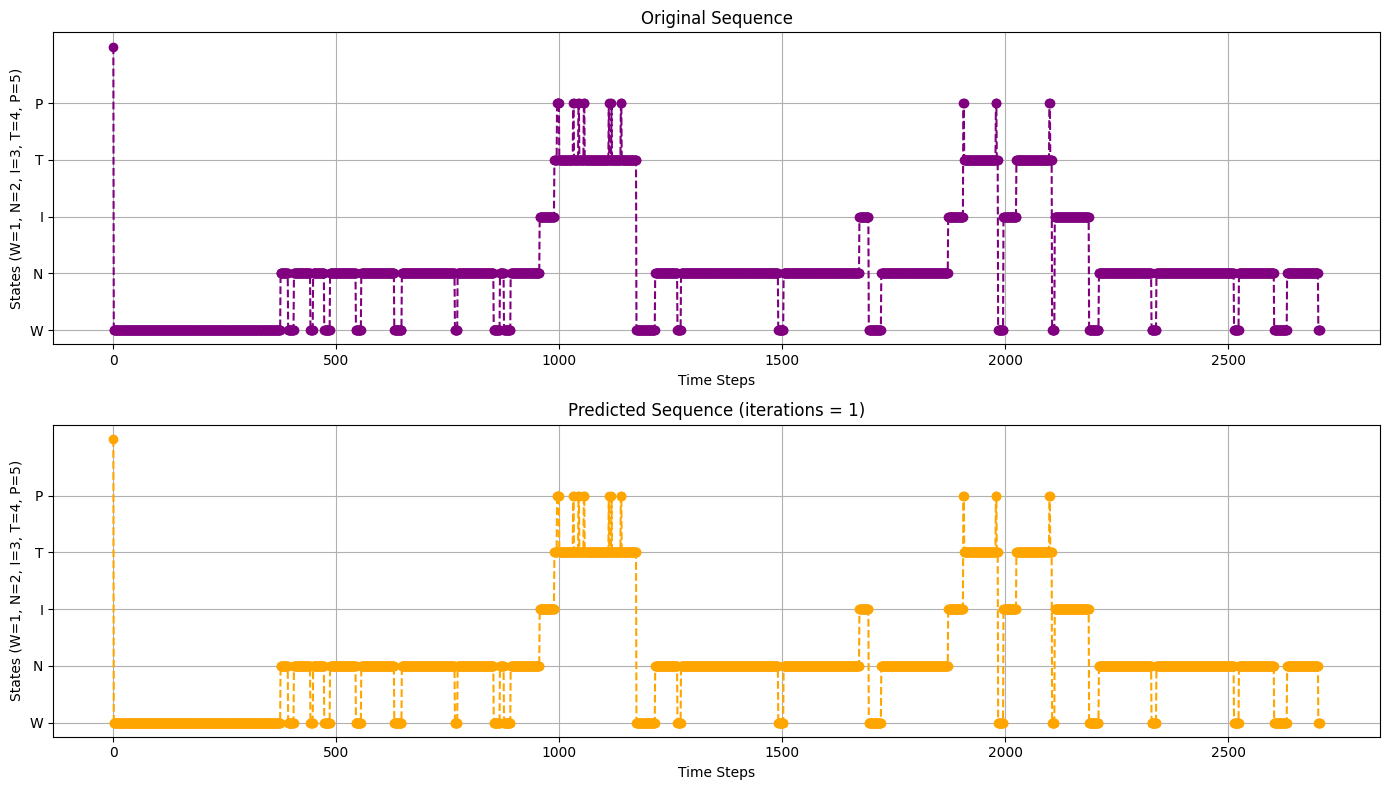


TRANSITION PROBABILITIES:
W → W: 0.9709
W → N: 0.0260
W → I: 0.0031
W → T: 0.0000
W → P: 0.0000
N → W: 0.0092
N → N: 0.9888
N → I: 0.0020
N → T: 0.0000
N → P: 0.0000
I → W: 0.0103
I → N: 0.0000
I → I: 0.9742
I → T: 0.0103
I → P: 0.0052
T → W: 0.0093
T → N: 0.0000
T → I: 0.0000
T → T: 0.9626
T → P: 0.0280
P → W: 0.0000
P → N: 0.0000
P → I: 0.0000
P → T: 0.4762
P → P: 0.5238



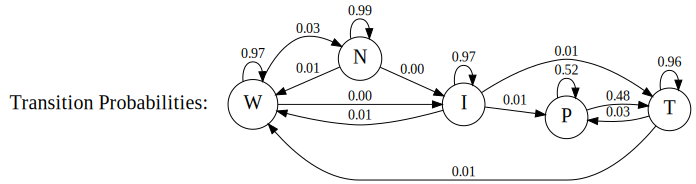

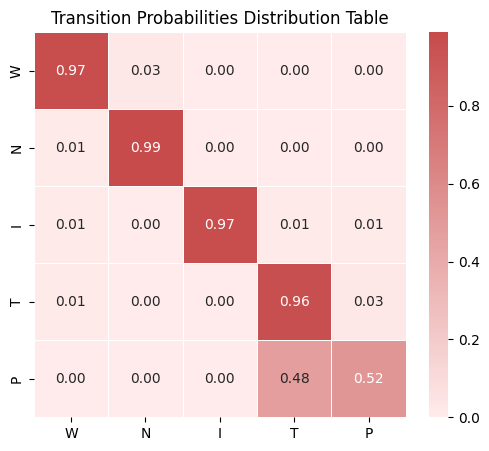

In [ ]:
# @title HMM Phasic Tonic REM NREM Intermediate (Week 7)
"""
Working for data in the sting_analysis_hypno.csv file

"""

#!pip install hmmlearn
#!pip install graphviz

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from graphviz import Digraph
import seaborn as sns
import pandas as pd

# ORIGINAL SEQUENCES -----------------------------------------------------------

def convert_sequence(sequence):
  return [1 if char == 'W' else 2 if char == 'N' else 3 if char == 'I' else 4 if char == 'T' else 5 if char =='P' else 6 for char in sequence]
input_sequence = "_WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWNNNNNNNNNWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIITTTTTTPPPPPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPPTTTTTTTTTTPPTTTTTTTTTTPPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPTTTTTPTTTTTTTTTTTTTTTTTTTTPPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNIIIIIIIIIIIIIIIIIIIIIWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIPPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPPTTTWWWWWWWWWWWWIIIIIIIIIIIIIIIIIIIIIIIIIIIIITTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPPTTTTWWWWWWIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWWWWWWWWWWWWWWWWWWWWWWWWWWWNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNWWWW"
original_sequence = convert_sequence(input_sequence)

# ------------------------------------------------------------------------------

original_sequence = np.array(original_sequence)
n_states = 6 # Number of hidden states

# NUMBER OF TRANSITIONS
transitions = 0
for i in range(1, len(original_sequence)):
    if original_sequence[i] != original_sequence[i - 1]:
        transitions += 1

# TRANSITION MATRIX
transition_matrix = np.zeros((n_states, n_states))
for (current_state,next_state) in zip(original_sequence[:-1],original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# EMISSION MATRIX
emission_matrix = np.eye(n_states)

# Convert observed sequence to 0-based indexing & set up observed counts for HMM
observed_sequence = (original_sequence - 1).reshape(-1, 1)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# HMM MODEL SETUP
model = hmm.MultinomialHMM(n_components=n_states,tol=0.01,random_state=42,init_params='')
start_state = original_sequence[0] - 1
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING ---------------------------------------------------------------------
iterations = 0
accuracy = 0
while accuracy < 1.0:
    iterations += 1
    model.fit(observed_counts)
    predicted_sequence = model.predict(observed_counts) + 1
    accuracy = accuracy_score(original_sequence, predicted_sequence)
    print(f"Iteration {iterations}:{accuracy * 100:.2f}%")

# OUTPUTS ----------------------------------------------------------------------
# ------------------------------------------------------------------------------

print(f"\nTraining completed in {iterations} iterations.")
print("")
print(f"input : {input_sequence}")
#print(f"Original Sequence: {original_sequence}")
#print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy (predicted sequence): {accuracy * 100:.2f}%")
print(f"Number of transitions between states: {transitions}")
print("")


plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='purple', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("States (W=1, N=2, I=3, T=4, P=5)")
#plt.xticks(np.arange(0, len(original_sequence), step=100))
plt.yticks([1, 2, 3, 4, 5], labels=['W', 'N', 'I', 'T', 'P'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='orange', marker='o', linestyle='dashed')
plt.title(f"Predicted Sequence (iterations = {iterations})")
plt.xlabel("Time Steps")
plt.ylabel("States (W=1, N=2, I=3, T=4, P=5)")
#plt.xticks(np.arange(0, len(predicted_sequence), step=100))
plt.yticks([1, 2, 3, 4, 5], labels=['W', 'N', 'I', 'T', 'P'])
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nTRANSITION PROBABILITIES:")
for i, state1 in enumerate(['W', 'N', 'I', 'T', 'P']):
    for j, state2 in enumerate(['W', 'N', 'I', 'T', 'P']):
        print(f"{state1} → {state2}: {transition_matrix[i, j]:.4f}")

# TRANSITION GRAPH
print("")
dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})

with dot.subgraph() as s:
    s.attr(rank='source')
    s.node('title', label='Transition Probabilities:', shape='plaintext', fontsize='20', fontcolor='black')

dot.node('W', label='W', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.node('N', label='N', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.node('I', label='I', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.node('T', label='T', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.node('P', label='P', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')

for i, state1 in enumerate(['W', 'N', 'I', 'T', 'P']):
    for j, state2 in enumerate(['W', 'N', 'I', 'T', 'P']):
        if transition_matrix[i, j] > 0:
            dot.edge(state1, state2, label=f'{transition_matrix[i, j]:.2f}', color='black', penwidth='1', fontcolor='black')

display(dot)

# PROBABILITY DISTRIBUTION TABLE
proba_matrix = transition_matrix[:5, :5]
proba_matrix_df = pd.DataFrame(proba_matrix,
                               columns=['W', 'N', 'I', 'T', 'P'],
                               index=['W', 'N', 'I', 'T', 'P'])

colors = ["#FFEBEB", "#C74B4B"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

plt.figure(figsize=(6, 5))
sns.heatmap(proba_matrix_df, annot=True, fmt=".2f", cmap=cmap, cbar=True,
            linewidths=0.5, linecolor='white')

plt.title('Transition Probabilities Distribution Table')
plt.show()

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Iteration 1:96.08%
Iteration 2:99.02%
Iteration 3:100.00%

Training completed in 3 iterations.

input : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPTTTTTTTTTTTTTTTTPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPTP
Accuracy (predicted sequence): 100.00%
Number of transitions between states: 7



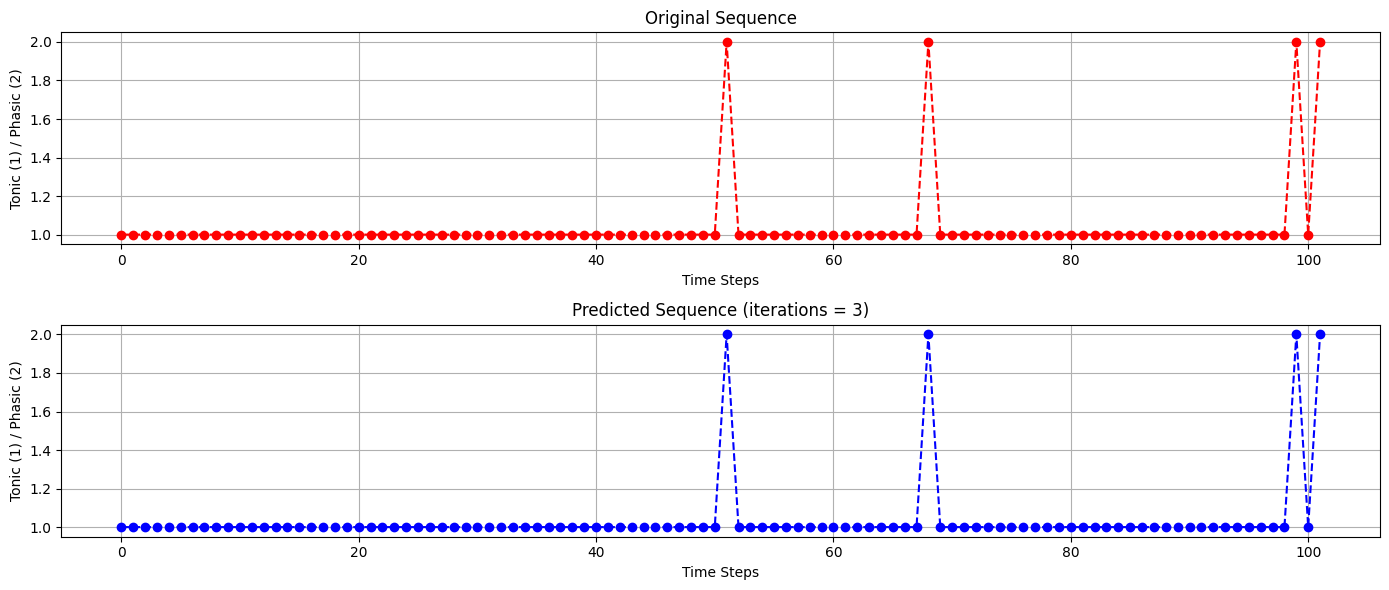


TRANSITION PROBABILITIES:
Staying in Tonic (1 → 1): 0.9592
Tonic to Phasic (1 → 2): 0.0408
Phasic to Tonic (2 → 1): 1.0000
Staying in Phasic (2 → 2): 0.0000



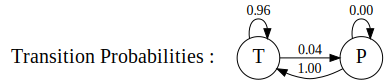

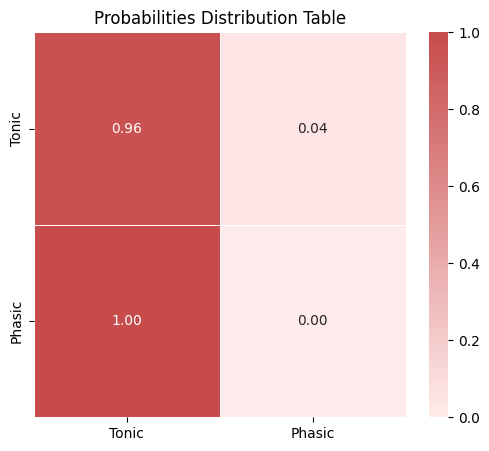

In [ ]:
# @title HMM Phasic Tonic (Week 6)
"""
Adds automatic iterations counting & transition plots
Removed not used features for phasic/tonic analysis cf. Week 5 version
Adds char sequence to array converter in # ORIGINAL SEQUENCES section

"""

!pip install hmmlearn
!pip install graphviz

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from graphviz import Digraph
import seaborn as sns
import pandas as pd

# ORIGINAL SEQUENCES -----------------------------------------------------------

def convert_sequence(sequence):
    return [1 if char == 'T' else 2 for char in sequence]
input_sequence = "TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPTTTTTTTTTTTTTTTTPTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTPTP"
original_sequence = convert_sequence(input_sequence)

# ------------------------------------------------------------------------------

original_sequence = np.array(original_sequence)
n_states = 2  # Number of hidden states (tonic and phasic)

# TRANSITION MATRIX
transition_matrix = np.zeros((n_states, n_states))
for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# EMISSION MATRIX (slightly noisy diagonal)
emission_matrix = np.eye(n_states) * 0.9 + 0.1 / n_states

# Convert observed sequence to 0-based indexing & set up observed counts for HMM (one-hot encoded observations)
observed_sequence = (original_sequence - 1).reshape(-1, 1)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# HMM MODEL SETUP
model = hmm.MultinomialHMM(n_components=n_states, tol=0.01, random_state=42, init_params='')
start_state = original_sequence[0] - 1
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING ---------------------------------------------------------------------
iterations = 0
accuracy = 0
while accuracy < 1.0:
    iterations += 1
    model.fit(observed_counts)
    predicted_sequence = model.predict(observed_counts) + 1
    accuracy = accuracy_score(original_sequence, predicted_sequence)
    print(f"Iteration {iterations}:{accuracy * 100:.2f}%")

# NUMBER OF TRANSITIONS --------------------------------------------------------
transitions = 0
for i in range(1, len(original_sequence)):
    if original_sequence[i] != original_sequence[i - 1]:
        transitions += 1

# OUTPUTS ----------------------------------------------------------------------
print(f"\nTraining completed in {iterations} iterations.")
print("")
print(f"input : {input_sequence}")
#print(f"Original Sequence: {original_sequence}")
#print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy (predicted sequence): {accuracy * 100:.2f}%")
print(f"Number of transitions between states: {transitions}")
print("")

# SEQUENCE PLOTS
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Tonic (1) / Phasic (2)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='blue', marker='o', linestyle='dashed')
plt.title(f"Predicted Sequence (iterations = {iterations})")
plt.xlabel("Time Steps")
plt.ylabel("Tonic (1) / Phasic (2)")
plt.grid(True)

plt.tight_layout()
plt.show()

# TRANSITION PROBABILITIES
p_Tonic_to_Tonic = transition_matrix[0, 0]
p_Tonic_to_Phase = transition_matrix[0, 1]
p_Phase_to_Tonic = transition_matrix[1, 0]
p_Phase_to_Phase = transition_matrix[1, 1]
print("\nTRANSITION PROBABILITIES:")
print(f"Staying in Tonic (1 → 1): {p_Tonic_to_Tonic:.4f}")
print(f"Tonic to Phasic (1 → 2): {p_Tonic_to_Phase:.4f}")
print(f"Phasic to Tonic (2 → 1): {p_Phase_to_Tonic:.4f}")
print(f"Staying in Phasic (2 → 2): {p_Phase_to_Phase:.4f}")

# 1
print("")
dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})
with dot.subgraph() as s:
    s.attr(rank='source')
    s.node('title', label='Transition Probabilities : ', shape='plaintext', fontsize='20', fontcolor='black')
dot.node('T', label='T', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.node('P', label='P', shape='circle', style='filled', fillcolor='white', fontcolor='black', fontsize='20')
dot.edge('T', 'T', label=f'{p_Tonic_to_Tonic:.2f}', color='black', fontcolor='black', penwidth='1', constraint='false')
dot.edge('P', 'P', label=f'{p_Phase_to_Phase:.2f}', color='black', fontcolor='black', penwidth='1', constraint='false')
dot.edge('T', 'P', label=f'{p_Tonic_to_Phase:.2f}', color='black', penwidth='1', fontcolor='black')
dot.edge('P', 'T', label=f'{p_Phase_to_Tonic:.2f}', color='black', penwidth='1', fontcolor='black')
display(dot)

# 2
print("")
proba_matrix = np.array([[p_Tonic_to_Tonic, p_Tonic_to_Phase],
                        [p_Phase_to_Tonic, p_Phase_to_Phase]])

proba_matrix_df = pd.DataFrame(proba_matrix,
                               columns=['Tonic', 'Phasic'],
                               index=['Tonic', 'Phasic'])

colors = ["#FFEBEB", "#C74B4B"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

plt.figure(figsize=(6, 5))
sns.heatmap(proba_matrix_df, annot=True, fmt=".2f", cmap=cmap, cbar=True,
            linewidths=0.5, linecolor='white')

plt.title('Probabilities Distribution Table')
plt.show()


# **OLD HMM CODES**

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


iterations: 40

Original Sequence: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
Predicted Sequence: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]

Original sequence length: 171
Accuracy (predicted sequence): 100.00%
Training iterations = 40

TRANSITION PROBABILITIES:
Staying in Tonic (1 → 1): 0.9503
Tonic to Phasic (1 → 2): 0.0497
Phasic to Tonic (2 → 1): 0.8889
Staying in Phasic (2 → 2): 0.1

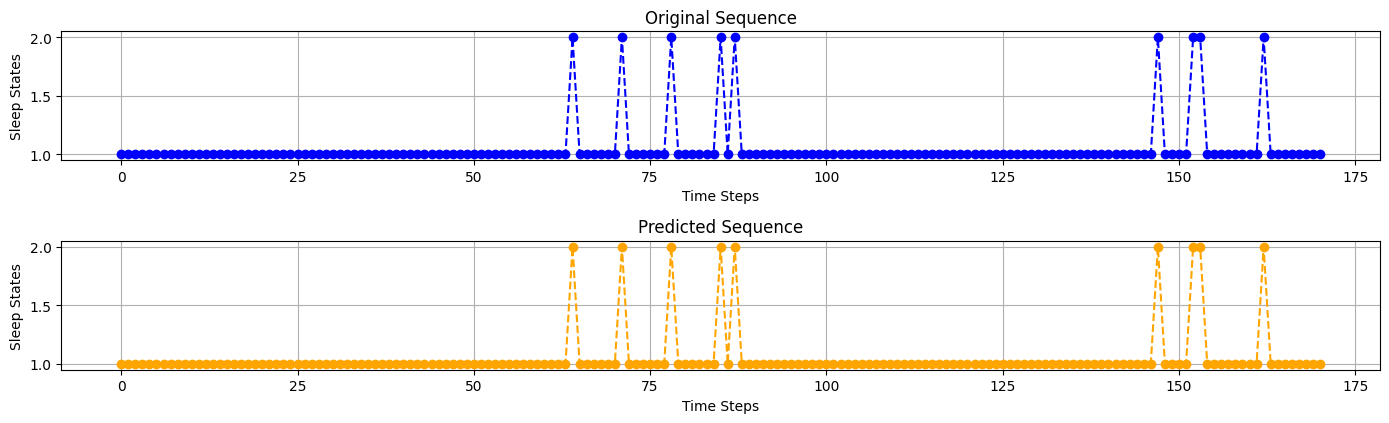

In [ ]:
# @title HMM (Week 5) (has some impotant fearutres removed in week 6 version)
"""
Currently the original sequences are phasic & tonic data.
That's why n_states=2 and the smoothing part is put on comment in the code.
Remember to adjust the number of iterations in TRAINING part of the code.
"""

#!pip install hmmlearn #put line on comment after first run

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ORIGINAL SEQUENCES -----------------------------------------------------------

# CBD ctrl (csv line 1)
# has 100% accuracy with 44 iterations
#original_sequence=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

# CBD tre (csv line 144)
# has 100% accuracy with 50 iterations
#original_sequence = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# RGS tre (csv line 560)
# has 100% accuracy with 8 iterations
original_sequence=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1]

# RGS ctrl (csv line 649)
# has 100% accuracy with 1 iteration
#original_sequence=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#-------------------------------------------------------------------------------

original_sequence = np.array(original_sequence)
n_states = 2  # HERE change the number of states to suit original_sequence

# TRANSITION MATRIX
transition_matrix = np.zeros((n_states, n_states))
for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

# EMISSION MATRIX (slightly noisy diagonal)
emission_matrix = np.eye(n_states) * 0.9 + 0.1 / n_states

# Convert observed sequence to 0-based indexing & set up observed counts for HMM (one-hot encoded observations)
observed_sequence = (original_sequence - 1).reshape(-1, 1)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# HMM MODEL
model = hmm.MultinomialHMM(n_components=n_states, n_iter=1, tol=0.01, random_state=42, init_params='')
start_state = original_sequence[0] - 1
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING ---------------------------------------------------------------------
#iterations = 1 #HERE change the number of iterations to train the model
iterations = int(input("iterations: "))
for _ in range(iterations):
    model.fit(observed_counts)
#-------------------------------------------------------------------------------

# PREDICTED SEQUENCE
predicted_sequence = model.predict(observed_counts)
predicted_sequence = predicted_sequence + 1

# SMOOTHING
def smooth_sequence(sequence):
    smoothed_sequence = []
    i = 0
    while i < len(sequence):
        count = 1
        while (i + 1 < len(sequence)) and (sequence[i] == sequence[i + 1]):
            count += 1
            i += 1
        if count > 1:
            smoothed_sequence.extend([sequence[i]] * count)
        else:
            if smoothed_sequence:
                smoothed_sequence.extend([smoothed_sequence[-1]] * count)
            else:
                smoothed_sequence.extend([sequence[i]] * count)
        i += 1
    return np.array(smoothed_sequence)

smoothed_sequence = smooth_sequence(predicted_sequence)

# REDUCTION
reduced_sequence = [smoothed_sequence[0]]
for i in range(1, len(smoothed_sequence)):
    if smoothed_sequence[i] != smoothed_sequence[i - 1]:
        reduced_sequence.append(smoothed_sequence[i])

reduced_sequence2 = [predicted_sequence[0]]
for i in range(1, len(predicted_sequence)):
    if predicted_sequence[i] != predicted_sequence[i - 1]:
        reduced_sequence2.append(predicted_sequence[i])

# NUMBER OF TRANSITIONS --------------------------------------------------------
transitions = 0
for i in range(1, len(original_sequence)):
    if original_sequence[i] != original_sequence[i - 1]:
        transitions += 1

# ACCURACY (%) & PROBABILITIES -------------------------------------------------
accuracy = accuracy_score(original_sequence, predicted_sequence)
accuracy2 = accuracy_score(original_sequence, smoothed_sequence)
print("")
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print("")
#print(f"Smoothed Sequence: {smoothed_sequence}")
#print("Reduced Sequence:", reduced_sequence)
print(f"Original sequence length: {len(original_sequence)}")
#print(f"Smoothed sequence length: {len(smoothed_sequence)}")
#print(f"Latent States (original): {len(reduced_sequence2)}")
#print(f"Latent States (smoothed): {len(reduced_sequence)}")
print(f"Accuracy (predicted sequence): {accuracy * 100:.2f}%")
#print(f"Accuracy (smoothed sequence): {accuracy2 * 100:.2f}%")
print(f"Training iterations = {iterations}")

p_Tonic_to_Tonic = transition_matrix[0, 0]
p_Tonic_to_Phase = transition_matrix[0, 1]
p_Phase_to_Tonic = transition_matrix[1, 0]
p_Phase_to_Phase = transition_matrix[1, 1]
print("")
print("TRANSITION PROBABILITIES:")
print(f"Staying in Tonic (1 → 1): {p_Tonic_to_Tonic:.4f}")
print(f"Tonic to Phasic (1 → 2): {p_Tonic_to_Phase:.4f}")
print(f"Phasic to Tonic (2 → 1): {p_Phase_to_Tonic:.4f}")
print(f"Staying in Phasic (2 → 2): {p_Phase_to_Phase:.4f}")
print(f"Number of transitions between states: {transitions}")

# FIGURES ----------------------------------------------------------------------
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(original_sequence, color='blue', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(predicted_sequence, color='orange', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

"""
plt.subplot(3, 1, 3)
plt.plot(smoothed_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Smoothed Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
"""

plt.tight_layout()
plt.show()



https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence: [3 2 2 5 5 5 5 4 4 4 4 1 4 4 4 4 4 1 2 2 2 2 2 2 2 2 2 2 4 4 1 3 3 3 3 3 5
 5 5 2 2 4 4 4 4 5 5 5 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 3
 3 3 3 3 5 5 5 2 2 2 2 2 2 1 1 1 1 4 5 5 5 5 5 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 3 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 2 2 1 1 1 1 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 2 2 2 1 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 4
 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 1 1 1 5 2 2 2 2 2 2 2 2
 2 4 4 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 2 2 2 4 4 4 4 4
 4 4 4 4 4 2 2 2 2 1 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 3 3 3 1 3 3 3 3 3 3 3
 4 4 4 4 2 2 2 2 2 5 5 5 5 5 3 3 3 3 3 1 1 1 1 1 1 1 1 4 4 4]
Predicted Sequence: [3 2 2 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 3 3 3 3 3 5
 5 5 2 2 4 4 4 4 5 5 5 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 2

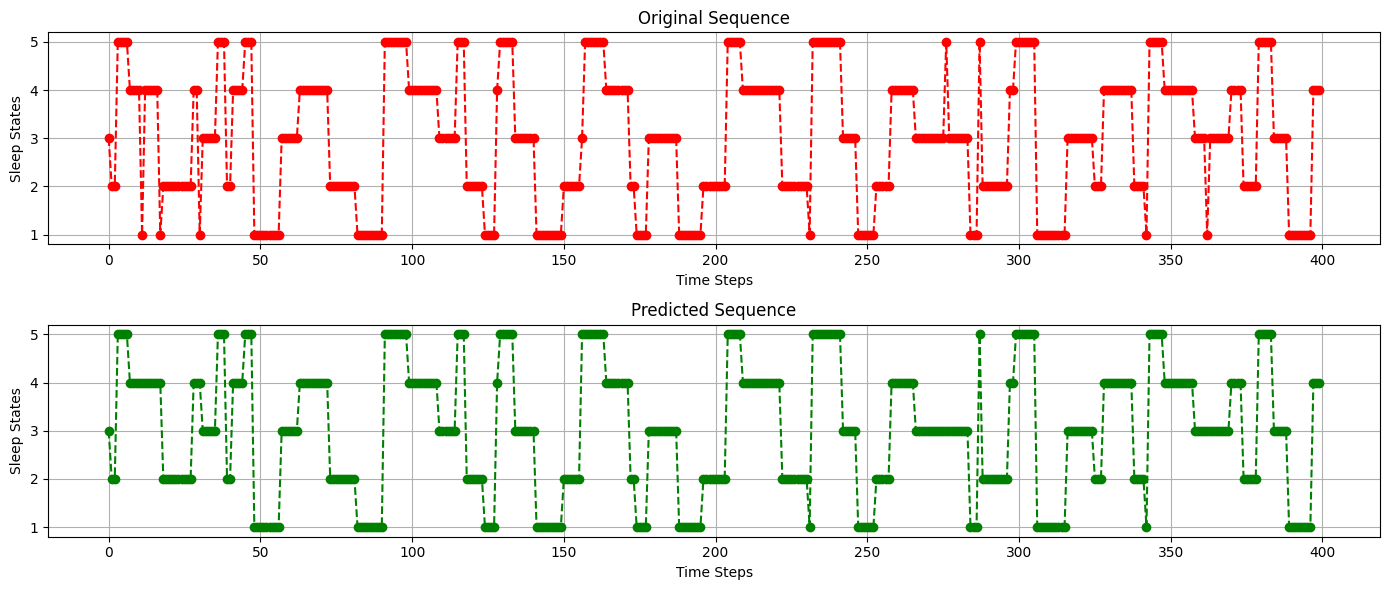

In [ ]:
# @title HMM V1
# this is the best one so far

# install hmmlearn first time running on colab : (line below)
# !pip install hmmlearn

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

original_sequence = [3, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 3, 3, 3, 3, 3, 5, 5, 5, 2, 2, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 5, 5, 5, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4]


original_sequence = np.array(original_sequence)
n_states = 5  # hidden states

# TRANSITION MATRIX
transition_matrix = np.zeros((n_states, n_states))
for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1
transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)  # normalize row-wise

# EMISSION MATRIX (slightly noisy diagonal)
emission_matrix = np.eye(n_states) * 0.9 + 0.1 / n_states

# Convert observed sequence to 0-based indexing & set up observed counts for HMM (one-hot encoded observations)
observed_sequence = (original_sequence - 1).reshape(-1, 1)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# HMM MODEL
model = hmm.MultinomialHMM(n_components=n_states, n_iter=1, tol=0.01, random_state=42, init_params='')
start_state = original_sequence[0] - 1  # convert to 0-based index
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1  # start with the same state as original sequence
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING
iterations = 100
for _ in range(iterations):
    model.fit(observed_counts)


# PREDICTED SEQUENCE
predicted_sequence = model.predict(observed_counts)
predicted_sequence = predicted_sequence + 1  # adjust back to 1-based indexing


# REDUCTION OF LATENT STATES
reduced_sequence = [predicted_sequence[0]]
for i in range(1, len(predicted_sequence)):
    if predicted_sequence[i] != predicted_sequence[i - 1]:
        reduced_sequence.append(predicted_sequence[i])

# ACCURACY (%)
accuracy = accuracy_score(original_sequence, predicted_sequence)
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print("Reduced Sequence:", reduced_sequence)
print(f"Original sequence length: {len(original_sequence)}")
print(f"Reduced sequence length: {len(reduced_sequence)}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# FIGURES
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

plt.tight_layout()
plt.show()


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted Sequence: [1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Accuracy: 46.23%


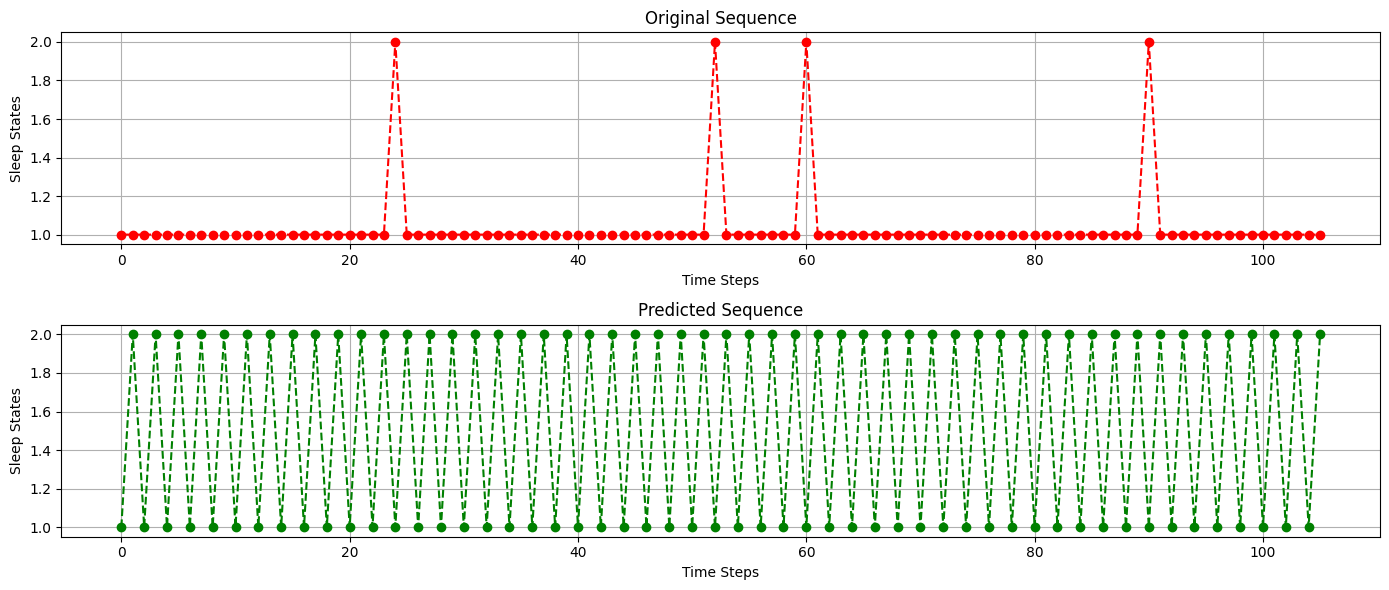

In [ ]:
# @title HMM V2
# this code is less accurate than one above

# install hmmlearn first time running on colab : (line below)
# !pip install hmmlearn

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# SEQUENCES
#original_sequence = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 1, 1, 2, 2, 3, 3, 4, 4, 5, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 1, 1, 2, 2, 3, 4, 4, 5] * 5
#original_sequence = [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 3, 3, 5, 5, 5, 3, 2, 2, 1, 1, 2, 3, 3, 4, 4, 4, 4, 3, 3, 5, 5, 5, 3, 2, 1, 1, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 3, 2, 1, 2, 3, 3, 3, 5, 5, 5, 5, 2, 1, 1, 2, 3, 5, 5, 5, 5, 3, 2, 1, 1, 1, 1] * 3
#original_sequence = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
#original_sequence = [3, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 3, 3, 3, 3, 3, 5, 5, 5, 2, 2, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 5, 5, 5, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4]
original_sequence = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
original_sequence = np.array(original_sequence)
n_states = 2

# TRANSITION MATRIX
transition_matrix = np.zeros((n_states, n_states))
for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True) # normalization of the transition matrix (row-wise)

# EMISSION MATRIX
emission_matrix = np.eye(n_states)

# Preprocess the observed sequence: convert to 0-based indexing
observed_sequence = (original_sequence - 1).reshape(-1, 1)

# Set up observed counts for HMM (one-hot encoded observations)
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)
for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1

# Initialize the HMM model with init_params='e' to keep the manual transition and start probabilities
model = hmm.MultinomialHMM(n_components=n_states, n_iter=2000, tol=0.01, random_state=42, init_params='e')

# START PROBABILITIES
start_state = original_sequence[0] - 1  # Convert to 0-based index
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1  # Set 100% start probability for the initial state of the original sequence

# TRANS & EMISSION MATRIXES
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# TRAINING
iterations = 200
for _ in range(iterations):
    model.fit(observed_counts)

# PREDICTED SEQUENCE
predicted_sequence = model.predict(observed_counts)
predicted_sequence = predicted_sequence + 1  # Adjust back to 1-based indexing

# ACCURACY (%)
accuracy = accuracy_score(original_sequence, predicted_sequence)
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# FIGURES
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#@title [old] 1

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score

sequence = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# the sequence is already created with the name : sequence
# Convert sequence to a numpy array and reshape for HMM
sequence = np.array(sequence).reshape(-1, 1)

n_hidden_states = 5

# Initialize and train the Gaussian HMM model
model = hmm.GaussianHMM(n_components=n_hidden_states, n_iter=100, tol=0.01, covariance_type="full")

# Fit the model to the original sequence
model.fit(sequence)

# Predict the sequence using the trained model
predicted_sequence = model.predict(sequence)

# Map predicted sequence back to original values
# HMM predicts states 0 through 4, map them back to 1 through 5
HMM_sequence = predicted_sequence + 1

# Post-process to reduce excessive consecutive repetitions predicted by the HMM
reduced_sequence = [HMM_sequence[0]]  # Start with the first element

# Iterate over predicted sequence and reduce unnecessary repetitions
for i in range(1, len(HMM_sequence)):
    if HMM_sequence[i] != HMM_sequence[i - 1]:
        reduced_sequence.append(HMM_sequence[i])

# Print first 50 elements for comparison
print("Original Sequence:", sequence.flatten())
print("HMM Sequence:", HMM_sequence)
print("Reduced Sequence:", reduced_sequence)
accuracy = accuracy_score(sequence, HMM_sequence)  # Compute accuracy
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# Print the lengths of original and reduced sequences
print(f"Original sequence length: {len(sequence)}")
print(f"Reduced sequence length: {len(reduced_sequence)}")


Original Sequence: [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3
 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5
 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3
 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5
 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2
 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5
 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2
 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5
 5 5 5 5 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
HMM Sequence: [3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 4 4 4 5 5
 5 5 5 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 1 1 1 1
 1 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 4 4 4 5
 5 5 5 5 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 1 1 1
 1 1 3 

In [ ]:
#@title [old] 2
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score

# Original sequence
sequence = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
            5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
            4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
            3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
            2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
            1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
            5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
            4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
            3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
            2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]

while len(sequence) < 400:
    numbers = np.random.permutation([1, 2, 3, 4, 5])
    for number in numbers:
        repetition = np.random.randint(1, 11)
        sequence.extend([number] * repetition)
    if len(sequence) >= 400:
        sequence = sequence[:400]
        break

sequence = np.array(sequence).reshape(-1, 1)

n_hidden_states = 5

model = hmm.GaussianHMM(n_components=n_hidden_states, n_iter=200, tol=0.01, covariance_type="full", random_state=42)

model.fit(sequence)

predicted_sequence = model.predict(sequence)

HMM_sequence = np.clip(predicted_sequence + 1, 1, 5).astype(int)

HMM_sequence[0] = sequence[0, 0]

reduced_sequence = [HMM_sequence[0]]

for i in range(1, len(HMM_sequence)):
    if HMM_sequence[i] != HMM_sequence[i - 1]:
        reduced_sequence.append(HMM_sequence[i])

print("Original Sequence:", sequence.flatten())
print("HMM Sequence:", HMM_sequence)
print("Reduced Sequence:", reduced_sequence)

# Calculate accuracy (Note: Original sequence must be reshaped)
accuracy = accuracy_score(sequence.flatten(), HMM_sequence)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")
print(f"Original sequence length: {len(sequence)}")
print(f"Reduced sequence length: {len(reduced_sequence)}")


Original Sequence: [2 2 2 2 2 2 2 2 2 4 4 5 5 5 5 1 1 1 1 1 1 1 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 5 5 5 5 5 5 1 1 1 1 1 1 4 4 4 4 5
 5 5 5 5 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 5 5 5 5 4 4 4
 4 4 4 4 4 4 3 3 3 3 3 3 3 4 4 4 1 1 1 1 1 1 2 2 2 2 5 5 5 5 5 5 5 3 3 3 4
 4 4 4 4 4 4 4 2 2 2 3 3 3 3 3 3 3 3 5 5 1 1 1 1 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 5 3
 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 5 5 5 5 5 5 4 4 4 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 4 3 3 3 3 3 3 3
 3 2 2 2 2 2 2 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 3 4 4 4 4 4 4 2 2 2 2 2 2 2 2
 2 2 5 5 5 5 5 1 3 3 4 4 4 4 2 4 4 4 3 3 3 3 3 1 1 1 5 5 5 5 5 1 1 1 1 1 1
 1 1 2 2 2 2 4 4 4 4 4 4 4 3 3 1 1 1 1 1 1 3 3 4 4 4 4 5 5 5]
HMM Sequence: [2 3 2 3 2 3 2 3 2 5 1 4 4 4 4 2 3 2 3 2 3 2 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 4 4 4 4 4 4 2 3 2 3 3 2 5 1 5 1 4
 4 4 

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence (first 50): [3 5 3 3 3 1 3 5 4 4 4 2 1 2 2 4 5 5 1 2 2 3 2 2 5 2 4 4 2 5 3 1 1 4 3 3 1
 1 4 5 3 2 5 4 4 1 3 5 2 4]
Predicted Sequence (first 50): [3, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 1, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 2, 2, 5, 1, 2, 5]
Prediction Accuracy: 19.25%


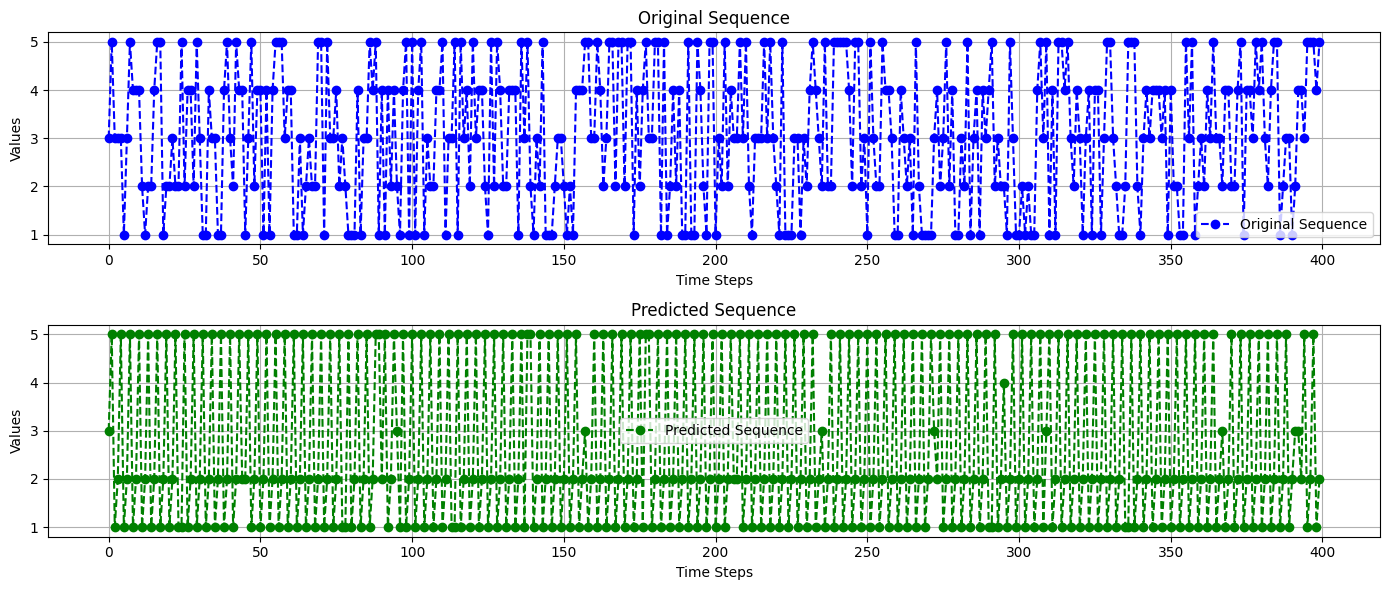

In [ ]:
#@title [old] 3
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a more deterministic transition matrix (high probability of staying in the same state)
transition_matrix = np.array([
    [0.9, 0.1, 0.0, 0.0, 0.0],  # Hidden state 1 is likely to stay in state 1 or go to state 2
    [0.0, 0.9, 0.1, 0.0, 0.0],  # Hidden state 2 is likely to stay in state 2 or go to state 3
    [0.0, 0.0, 0.9, 0.1, 0.0],  # Hidden state 3 is likely to stay in state 3 or go to state 4
    [0.0, 0.0, 0.0, 0.9, 0.1],  # Hidden state 4 is likely to stay in state 4 or go to state 5
    [0.1, 0.0, 0.0, 0.0, 0.9]   # Hidden state 5 is likely to stay in state 5 or go to state 1
])

# Define a more deterministic emission matrix (each state strongly prefers a specific observable)
emission_matrix = np.array([
    [0.95, 0.02, 0.01, 0.01, 0.01],  # Hidden state 1 strongly emits 1
    [0.02, 0.95, 0.01, 0.01, 0.01],  # Hidden state 2 strongly emits 2
    [0.01, 0.01, 0.95, 0.02, 0.01],  # Hidden state 3 strongly emits 3
    [0.01, 0.01, 0.02, 0.95, 0.01],  # Hidden state 4 strongly emits 4
    [0.01, 0.01, 0.01, 0.01, 0.96]   # Hidden state 5 strongly emits 5
])

# Generate an original sequence based on hidden states and emission probabilities
n_hidden_states = 5
n_observations = 400
hidden_states = np.random.choice(n_hidden_states, size=n_observations, p=[0.2, 0.2, 0.2, 0.2, 0.2])

# Generate observed sequence based on hidden states and emission probabilities
observed_sequence = []
for state in hidden_states:
    observed = np.random.choice([1, 2, 3, 4, 5], p=emission_matrix[state])
    observed_sequence.append(observed)

# Convert observed sequence to array and reshape for fitting the model
observed_sequence = np.array(observed_sequence).reshape(-1, 1)

# Initialize the HMM model with multinomial distribution
model = hmm.MultinomialHMM(n_components=n_hidden_states, n_iter=100, tol=0.01, random_state=42)
model.startprob_ = np.array([1.0, 0.0, 0.0, 0.0, 0.0])  # Start from state 1
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# Fit the model to the observed sequence
model.fit(observed_sequence)

# Predict the hidden states from the observed sequence
predicted_hidden_states = model.predict(observed_sequence)

# Ensure that the first element of the predicted sequence matches the first element of the original sequence
predicted_hidden_states[0] = hidden_states[0]

# Re-generate the predicted sequence from the hidden states
predicted_sequence = []
for state in predicted_hidden_states:
    observed = np.random.choice([1, 2, 3, 4, 5], p=emission_matrix[state])
    predicted_sequence.append(observed)

# Ensure the first value of the predicted sequence matches the original sequence
predicted_sequence[0] = observed_sequence[0, 0]

# Compare the predicted sequence with the original sequence
accuracy = accuracy_score(observed_sequence.flatten(), predicted_sequence)

# Output results
print("Original Sequence (first 50):", observed_sequence.flatten()[:50])
print("Predicted Sequence (first 50):", predicted_sequence[:50])
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# Plot the original sequence and the predicted sequence
plt.figure(figsize=(14, 6))

# Plot original sequence
plt.subplot(2, 1, 1)
plt.plot(observed_sequence.flatten(), label="Original Sequence", color='blue', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.grid(True)
plt.legend()

# Plot predicted sequence
plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, label="Predicted Sequence", color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-19-a1837cbaae6c>:21: RuntimeWarning: invalid value encountered in divide
  transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True) # Normalize transition matrix so each row sums to 1
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence: [1 3 3 3 5 1 1 3 3 5 1 4 5 1 3 3 4 5 1 3 3 3 5 1 4 3 3 5 1 4 3 3 5 1 4 5 1
 3 3 3 5 1 1 3 3 5 4 5 1 3 3 3 4 5 1 4 3 3 5 1 4 3 3 5 1 3 3 3 5 1 3 3 5 1
 1 4 3 3 5 1 4 5 1 3 3 3 5 1 3 3 5]
Predicted Sequence: [2 1 2 3 4 5 1 2 3 4 5 1 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 4 5
 1 2 3 4 5 1 2 3 4 3 4 5 1 2 2 3 4 5 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5 2 3 4 5
 5 1 2 3 4 5 1 4 5 1 2 3 4 5 2 3 4]
Accuracy: 17.58%


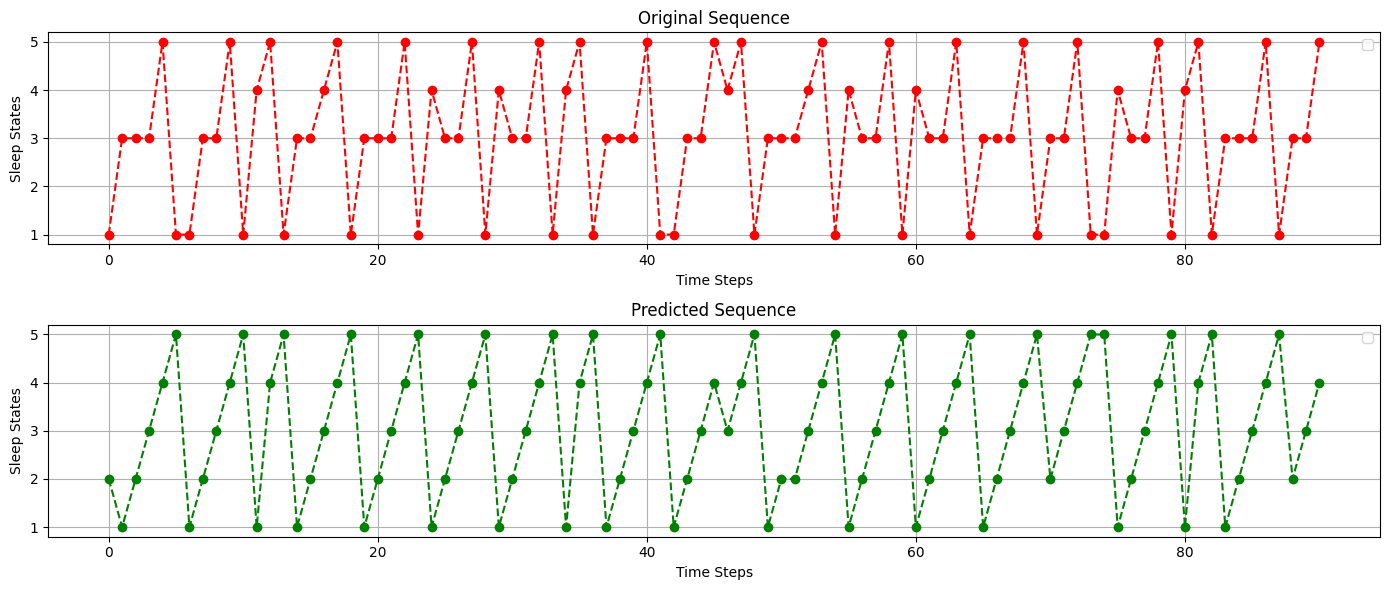

In [ ]:
# @title [old] 4
# install hmmlearn first time running on colab : (line below)
# !pip install hmmlearn

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

original_sequence = [1, 3, 3, 3, 5, 1, 1, 3, 3, 5, 1, 4, 5, 1, 3, 3, 4, 5, 1, 3, 3, 3, 5, 1, 4, 3, 3, 5, 1, 4, 3, 3, 5, 1, 4, 5, 1, 3, 3, 3, 5, 1, 1, 3, 3, 5, 4, 5, 1, 3, 3, 3, 4, 5, 1, 4, 3, 3, 5, 1, 4, 3, 3, 5, 1, 3, 3, 3, 5, 1, 3, 3, 5, 1, 1, 4, 3, 3, 5, 1, 4, 5, 1, 3, 3, 3, 5, 1, 3, 3, 5]

original_sequence = np.array(original_sequence)

#transition matrix
n_states = 5
transition_matrix = np.zeros((n_states, n_states))

for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True) # Normalize transition matrix so each row sums to 1

#emission matrix
emission_matrix = np.eye(n_states)

#hidden markov model
observed_sequence = (original_sequence - 1).reshape(-1, 1)  # convert to 0-based indexing

n_trials = np.ones(observed_sequence.shape[0])  # each observation is a single trial

observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int) # create the observed counts for HMM training

for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1  # Set the count for the observed value

model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=0.01, random_state=42) # initialize the HMM model using the calculated transition and emission matrices

model.startprob_ = np.array([1] + [0] * (n_states - 1))  # start probabilities (start from state 1)

model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix
model.n_trials = n_trials

model.fit(observed_counts) # fit the HMM model to the observed counts
predicted_sequence = model.predict(observed_counts)
predicted_sequence[0] = original_sequence[0] # ensure that the first element of the predicted sequence matches the first element of the original sequence
predicted_sequence = predicted_sequence + 1 # adjust the predicted sequence values to match the original value range (1 to 5)

# OUTPUTS :
accuracy = accuracy_score(original_sequence, predicted_sequence)
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy: {accuracy * 100:.2f}%")


# FIGURES :
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence: [1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4
 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1
 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1
 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4
 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4
 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2
 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2
 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5
 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5
 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3
 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5]
Predicted Sequence: [1 2 2 3 3 3 3 3 3 4 4 5 5 1 2 2 2 3 3 3 3 3 3 4 4 4 5 5 5 1 2 3 3 3 3 4 4
 5 1 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 5 5 5 5 1 2 2 3 3 3 3 3 4 4 5 5 5 5 1 2

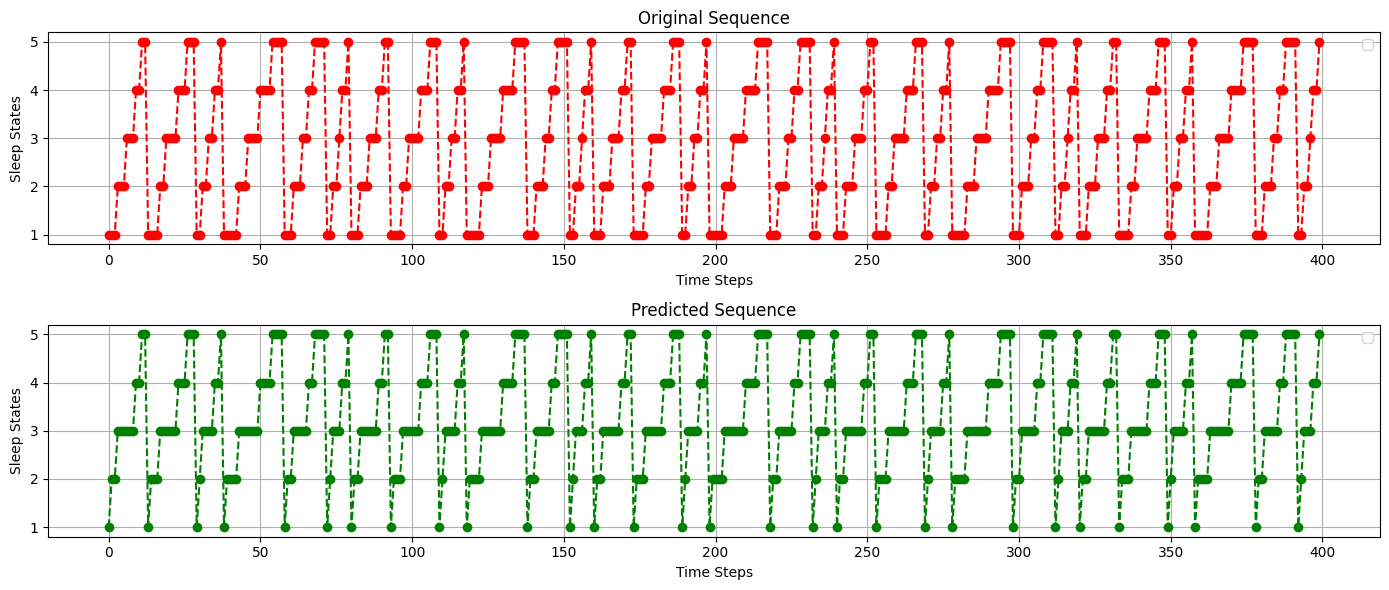

In [ ]:
# @title [old] 5

# This program uses a random sequence

# install hmmlearn first time running on colab : (line below)
!pip install hmmlearn

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

original_sequence = [
    1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
    4, 5, 5, 1, 1, 1, 1, 2, 2, 3,
    3, 3, 3, 4, 4, 4, 5, 5, 5, 1,
    1, 2, 2, 3, 3, 4, 4, 5, 1, 1,
    1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
    4, 4, 4, 4, 5, 5, 5, 5, 1, 1,
    1, 2, 2, 2, 3, 3, 4, 4, 5, 5,
    5, 5, 1, 1, 2, 2, 3, 4, 4, 5] * 5  # 400 numbers in total following a certain pattern

original_sequence = np.array(original_sequence)

#Transition matrix
n_states = 5
transition_matrix = np.zeros((n_states, n_states))

for (current_state, next_state) in zip(original_sequence[:-1], original_sequence[1:]):
    transition_matrix[current_state - 1, next_state - 1] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # Normalize transition matrix

#Emission matrix
emission_matrix = np.eye(n_states)

#HMM
observed_sequence = (original_sequence - 1).reshape(-1, 1)  # convert to 0-based indexing

n_trials = np.ones(observed_sequence.shape[0])  # each observation is a single trial

observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)  # create observed counts for HMM

for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1  # Set the count for the observed value

#Initialize the HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=0.01, random_state=42)
start_state = original_sequence[0] - 1  # Convert to 0-based index
model.startprob_ = np.zeros(n_states)
model.startprob_[start_state] = 1  # Set 100% start probability at the initial state of the original sequence

model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix
model.n_trials = n_trials

#Fit the model to the observed counts
model.fit(observed_counts)

#Predict the sequence
predicted_sequence = model.predict(observed_counts)
predicted_sequence = predicted_sequence + 1  # Adjust back to 1-based indexing

#Accuracy
accuracy = accuracy_score(original_sequence, predicted_sequence)
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy: {accuracy * 100:.2f}%")

#figures
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Original Sequence: [1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4
 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1
 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1
 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4
 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2 3 3 3 3 4 4
 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2
 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5 1 1 1 1 2 2
 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 5 5
 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5 1 1 1 2 2 2 3 3 3 4 4 5 5
 1 1 1 1 2 2 3 3 3 3 4 4 4 5 5 5 1 1 2 2 3 3 4 4 5 1 1 1 1 1 2 2 2 3 3 3 3
 4 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4 5 5 5 5 1 1 2 2 3 4 4 5]
Predicted Sequence: [4 5 3 3 3 3 3 3 3 4 4 2 2 2 2 1 5 3 3 3 3 3 3 4 4 4 2 2 2 1 5 3 3 3 3 4 4
 2 2 2 2 1 5 3 3 3 3 3 3 3 4 4 4 4 2 2 2 2 2 1 5 3 3 3 3 3 4 4 2 2 2 2 1 5

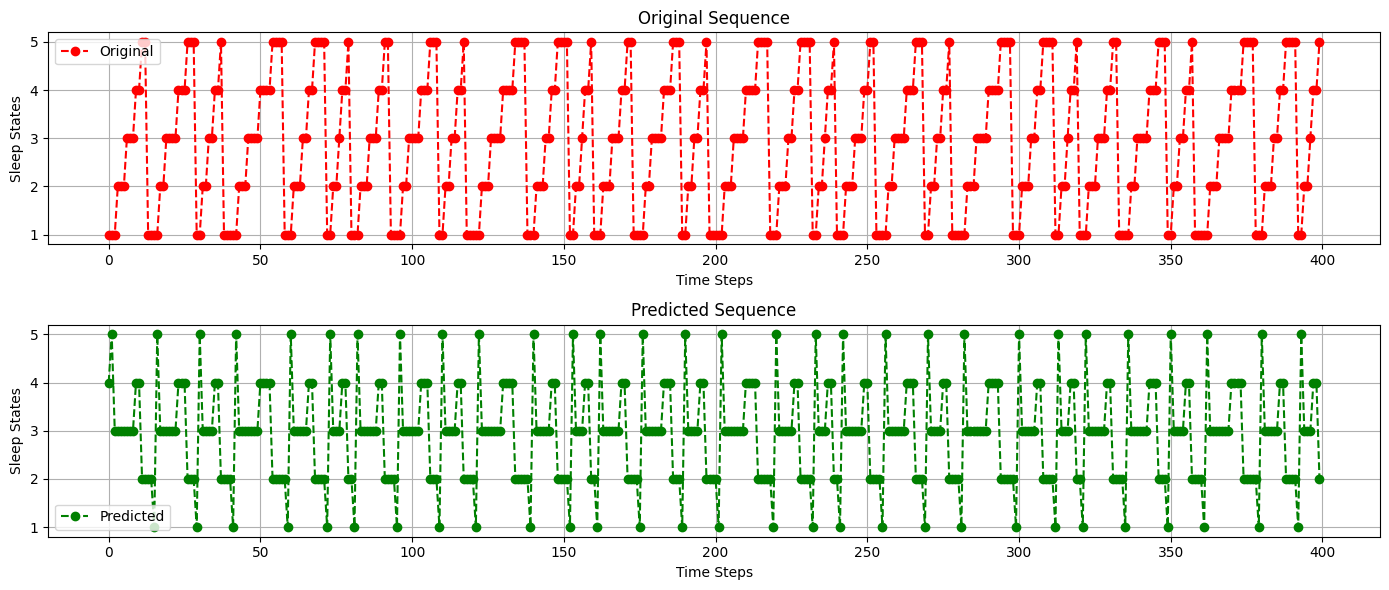

In [ ]:
# @title [old] 6

# This program uses a random sequence

# install hmmlearn first time running on colab : (line below)

!pip install hmmlearn

import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Original sequence with a repeating pattern
original_sequence = [
    1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
    4, 5, 5, 1, 1, 1, 1, 2, 2, 3,
    3, 3, 3, 4, 4, 4, 5, 5, 5, 1,
    1, 2, 2, 3, 3, 4, 4, 5, 1, 1,
    1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
    4, 4, 4, 4, 5, 5, 5, 5, 1, 1,
    1, 2, 2, 2, 3, 3, 4, 4, 5, 5,
    5, 5, 1, 1, 2, 2, 3, 4, 4, 5] * 5  # 400 numbers in total following a certain pattern

original_sequence = np.array(original_sequence)

n_states = 5

# HMM - Preprocessing the observed sequence
observed_sequence = (original_sequence - 1).reshape(-1, 1)  # Convert to 0-based indexing

n_trials = np.ones(observed_sequence.shape[0])  # Each observation is a single trial

# Create observed counts for the HMM
observed_counts = np.zeros((observed_sequence.shape[0], n_states), dtype=int)

for i in range(observed_sequence.shape[0]):
    observed_counts[i, observed_sequence[i, 0]] = 1  # Set the count for the observed value

# Initialize the HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=1, tol=0.01, random_state=42)

# Number of iterations to refine the model
iterations = 5

# Train the model iteratively
for _ in range(iterations):
    model.fit(observed_counts)

# Predict the sequence using the trained model
predicted_sequence = model.predict(observed_counts)
predicted_sequence = predicted_sequence + 1  # Adjust back to 1-based indexing

# Calculate accuracy
accuracy = accuracy_score(original_sequence, predicted_sequence)
print(f"Original Sequence: {original_sequence}")
print(f"Predicted Sequence: {predicted_sequence}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(original_sequence, color='red', marker='o', linestyle='dashed')
plt.title("Original Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend(['Original'])

plt.subplot(2, 1, 2)
plt.plot(predicted_sequence, color='green', marker='o', linestyle='dashed')
plt.title("Predicted Sequence")
plt.xlabel("Time Steps")
plt.ylabel("Sleep States")
plt.grid(True)
plt.legend(['Predicted'])

plt.tight_layout()
plt.show()


# **Creating a random sequence :**

In [ ]:
#@title Creating a random sequence
import numpy as np

sequence = []

while len(sequence) < 400:
    numbers = np.random.permutation([1, 2, 3, 4, 5])
    for number in numbers:
        repetition = np.random.randint(1, 11)
        sequence.extend([number] * repetition)
    if len(sequence) >= 400:
        sequence = sequence[:400]
        break

print("Sequence of 400 numbers randomly picked from 1 to 5, repeating 1 to 10 times:")
print(sequence)

Sequence of 400 numbers randomly picked from 1 to 5, repeating 1 to 10 times:
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 1, 1, 4, 4, 4, 4, 4, 4, 5, 5, 5, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5, 5, 5, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 

# **[other] Extracting a dataset**

In [ ]:
#@title [other] dataset_extraction.py
import h5py
import numpy as np
import random

def training_dataset_OS_RGS_CBD(file_path, n_states, n_repeat_states, rat_indices_OS, rat_indices_RGS, rat_indices_CBD):
    """
    Extract a training dataset from the OS_RGS_CBD.h5 file.

    Parameters :
    file_path (str): the file_path to the OS_RGS_CBD.h5 file
    n_states (int array): an array of 5 integers : [n_artefact, n_wake, n_nrem, n_TS, n_rem]. Each integer corresponds to the number of wanted epochs for the given state.
    n_repeat_states (int array): an array of 5 integers : [n_repeat_artefact, n_repeat_wake, n_repeat_nrem, n_repeat_TS, n_repeat_rem].
                      Each integer corresponds to the number of times the epochs of the given state will be repeated in the training dataset.
    rat_indices_OS (int array): the indices of the rats from the OS_Basic dataset that would be included in the training dataset. #Included in [1, 3, 4, 6, 9, 11, 13]
    rat_indices_RGS (int array): the indices of the rats from the RGS14 dataset that would be included in the training dataset. #Included in [1, 2, 3, 4, 6, 7, 8, 9] (RGS control : [1, 2, 6, 9] and RGS positive : [3, 4, 7, 8])
    rat_indices_CBD (int array): the indices of the rats from the CBD dataset that would be included in the training dataset. #Included in [3, 4, 5, 6]

    Returns :
    float numpy.array : an array containing the features for each epoch of the training dataset.
    int numpy.array : an array containing the manual sleep state scoring of each epoch of the training dataset.
    """
    n_artefact, n_wake, n_nrem, n_TS, n_rem = n_states
    n_repeat_artefact, n_repeat_wake, n_repeat_nrem, n_repeat_TS, n_repeat_rem = n_repeat_states
    training_dataset = np.empty((0, 10))
    manual_scoring = np.array([])

    array_scores_total = np.array([])
    array_features_total = np.empty((0, 10))
    indices_artefact_total = np.array([])
    indices_wake_total = np.array([])
    indices_nrem_total = np.array([])
    indices_TS_total = np.array([])
    indices_rem_total = np.array([])
    with h5py.File(file_path, 'r') as hdf:
      for i in rat_indices_OS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["OS_basic"][f"Rat{i}"]:
            group = hdf["OS_basic"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)

        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)

      for i in rat_indices_RGS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["RGS14"][f"Rat{i}"]:
            group = hdf["RGS14"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)

        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)
      for i in rat_indices_CBD:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["CBD"][f"Rat{i}"]:
            group = hdf["CBD"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)
        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)

    selected_indices_artefact = random.sample(list(indices_artefact_total), n_artefact)
    selected_indices_wake = random.sample(list(indices_wake_total), n_wake)
    selected_indices_nrem = random.sample(list(indices_nrem_total), n_nrem)
    selected_indices_TS = random.sample(list(indices_TS_total), n_TS)
    selected_indices_rem = random.sample(list(indices_rem_total), n_rem)
    selected_indices_artefact = np.ravel([[el]* n_repeat_artefact for el in selected_indices_artefact])
    selected_indices_wake = np.ravel([[el]* n_repeat_wake for el in selected_indices_wake])
    selected_indices_nrem = np.ravel([[el]* n_repeat_nrem for el in selected_indices_nrem])
    selected_indices_TS = np.ravel([[el]* n_repeat_TS for el in selected_indices_TS])
    selected_indices_rem = np.ravel([[el]* n_repeat_rem for el in selected_indices_rem])

    features_artefact = array_features_total[selected_indices_artefact.astype(int)]
    scores = array_scores_total[selected_indices_artefact.astype(int)]
    training_dataset = np.concatenate((training_dataset, features_artefact), axis=0)
    manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    features_wake = array_features_total[selected_indices_wake.astype(int)]
    scores = array_scores_total[selected_indices_wake.astype(int)]
    training_dataset = np.concatenate((training_dataset, features_wake), axis=0)          # Filling up training dataset
    manual_scoring = np.concatenate((manual_scoring, scores), axis=0)                     # Filling up corresponding manual scores

    features_nrem = array_features_total[selected_indices_nrem.astype(int)]
    scores = array_scores_total[selected_indices_nrem.astype(int)]
    training_dataset = np.concatenate((training_dataset, features_nrem), axis=0)
    manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    features_TS = array_features_total[selected_indices_TS.astype(int)]
    scores = array_scores_total[selected_indices_TS.astype(int)]
    training_dataset = np.concatenate((training_dataset, features_TS), axis=0)
    manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    features_rem = array_features_total[selected_indices_rem.astype(int)]
    scores = array_scores_total[selected_indices_rem.astype(int)]
    training_dataset = np.concatenate((training_dataset, features_rem), axis=0)
    manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    paired = list(zip(training_dataset, manual_scoring))

    # Shuffle the paired list
    random.shuffle(paired)

    # Unzip the shuffled, paired list back into features and scores
    training_dataset, manual_scoring = zip(*paired)
    # training_dataset = np.array()
    training_dataset = np.array(training_dataset)
    manual_scoring = np.array(manual_scoring)

    return training_dataset, manual_scoring.astype(int)

def dataset_OS_RGS_CBD(file_path, rat_indices_OS, rat_indices_RGS, rat_indices_CBD, states):
    """
    Extract a dataset from the OS_RGS_CBD.h5 file.

    Parameters :
    file_path (str): the file_path to the OS_RGS_CBD.h5 file
    rat_indices_OS (int array): the indices of the rats from the OS_Basic dataset that would be included in the training dataset. #Included in [1, 3, 4, 6, 9, 11, 13]
    rat_indices_RGS (int array): the indices of the rats from the RGS14 dataset that would be included in the training dataset. #Included in [1, 2, 3, 4, 6, 7, 8, 9] (RGS control : [1, 2, 6, 9] and RGS positive : [3, 4, 7, 8])
    rat_indices_CBD (int array): the indices of the rats from the CBD dataset that would be included in the training dataset. #Included in [3, 4, 5, 6]
    states : (str array) : an array containing the names of the states wanted in the dataset #Included in  ["artefact", "Wake", "NREM", "TS", "REM]

    Returns :
    float numpy.array : an array containing the features for each epoch of the dataset.
    int numpy.array : an array containing the manual sleep state scoring of each epoch of the dataset.

    Notes:
    The dataset obtained is not in a chronological order.
    """
    dataset = np.empty((0, 10))
    manual_scoring = np.array([])

    array_scores_total = np.array([])
    array_features_total = np.empty((0, 10))
    indices_artefact_total = np.array([])
    indices_wake_total = np.array([])
    indices_nrem_total = np.array([])
    indices_TS_total = np.array([])
    indices_rem_total = np.array([])
    with h5py.File(file_path, 'r') as hdf:
      for i in rat_indices_OS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["OS_basic"][f"Rat{i}"]:
            group = hdf["OS_basic"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)

        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)

      for i in rat_indices_RGS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["RGS14"][f"Rat{i}"]:
            group = hdf["RGS14"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)

        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)

      for i in rat_indices_CBD:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["CBD"][f"Rat{i}"]:
            group = hdf["CBD"][f"Rat{i}"][group_name]
            array_scores = np.concatenate((array_scores, group['Mapped_scores'][:]), axis = 0)
            array_features = np.concatenate((array_features, group['Features'][:]), axis = 0)
        indices_artefact = np.where(array_scores == 0)[0] # Artefact
        indices_wake = np.where(array_scores == 1)[0] # Wake
        indices_nrem = np.where(array_scores == 3)[0] # NREM
        indices_TS = np.where(array_scores  == 4)[0] #TS
        indices_rem = np.where(array_scores == 5)[0] # REM
        len_scores = len(array_scores_total)
        array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
        array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
        indices_artefact = np.array([el + len_scores for el in indices_artefact])
        indices_wake = np.array([el + len_scores for el in indices_wake])
        indices_nrem = np.array([el + len_scores for el in indices_nrem])
        indices_TS = np.array([el + len_scores for el in indices_TS])
        indices_rem = np.array([el + len_scores for el in indices_rem])
        indices_artefact_total = np.concatenate((indices_artefact_total, indices_artefact), axis = 0)
        indices_wake_total = np.concatenate((indices_wake_total, indices_wake), axis = 0)
        indices_nrem_total = np.concatenate((indices_nrem_total, indices_nrem), axis = 0)
        indices_TS_total = np.concatenate((indices_TS_total, indices_TS), axis = 0)
        indices_rem_total = np.concatenate((indices_rem_total, indices_rem), axis = 0)

    states = [el.lower() for el in states]

    if "artefact" in states:
      features_artefact = array_features_total[indices_artefact_total.astype(int)]
      scores = array_scores_total[indices_artefact_total.astype(int)]
      dataset = np.concatenate((dataset, features_artefact), axis=0)
      manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    if "wake" in states:
      features_wake = array_features_total[indices_wake_total.astype(int)]
      scores = array_scores_total[indices_wake_total.astype(int)]
      dataset = np.concatenate((dataset, features_wake), axis=0)
      manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    if "nrem" in states:
      features_nrem = array_features_total[indices_nrem_total.astype(int)]
      scores = array_scores_total[indices_nrem_total.astype(int)]
      dataset = np.concatenate((dataset, features_nrem), axis=0)
      manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    if "ts" in states:
      features_TS = array_features_total[indices_TS_total.astype(int)]
      scores = array_scores_total[indices_TS_total.astype(int)]
      dataset = np.concatenate((dataset, features_TS), axis=0)
      manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    if "rem" in states:
      features_rem = array_features_total[indices_rem_total.astype(int)]
      scores = array_scores_total[indices_rem_total.astype(int)]
      dataset = np.concatenate((dataset, features_rem), axis=0)
      manual_scoring = np.concatenate((manual_scoring, scores), axis=0)

    dataset = np.array(dataset)
    manual_scoring = np.array(manual_scoring)

    return dataset, manual_scoring.astype(int)

def dataset_in_order_OS_RGS_CBD(file_path, rat_indexes_OS, rat_indexes_RGS, rat_indexes_CBD, states):
    """
    Extract a dataset from the OS_RGS_CBD.h5 file while keeping the epochs in a chronolical order for each posttrial.

    Parameters :
    file_path (str): the file_path to the OS_RGS_CBD.h5 file
    rat_indices_OS (int array): the indices of the rats from the OS_Basic dataset that would be included in the training dataset. #Included in [1, 3, 4, 6, 9, 11, 13]
    rat_indices_RGS (int array): the indices of the rats from the RGS14 dataset that would be included in the training dataset. #Included in [1, 2, 3, 4, 6, 7, 8, 9] (RGS control : [1, 2, 6, 9] and RGS positive : [3, 4, 7, 8])
    rat_indices_CBD (int array): the indices of the rats from the CBD dataset that would be included in the training dataset. #Included in [3, 4, 5, 6]
    states : (str array) : an array containing the names of the states wanted in the dataset #Included in  ["artefact", "Wake", "NREM", "TS", "REM]

    Returns :
    float numpy.array : an array containing the features for each epoch of the dataset.
    int numpy.array : an array containing the manual sleep state scoring of each epoch of the dataset.

    Notes:
    The dataset obtained is in a chronological order.
    If not all the states are included in the posttrial, this function will take a longer time than the dataset_OS_RGS_CBD function.
    """
    dataset = np.empty((0, 10))
    manual_scoring = np.array([])
    states = [el.lower() for el in states]
    int_states = []
    if "artefact" in states:
      int_states.append(0)
    if "wake" in states:
      int_states.append(1)
    if "nrem" in states:
      int_states.append(3)
    if "ts" in states:
      int_states.append(4)
    if "rem" in states:
      int_states.append(5)

    array_scores_total = np.array([])
    array_features_total = np.empty((0, 10))
    indices_artefact_total = np.array([])
    indices_wake_total = np.array([])
    indices_nrem_total = np.array([])
    indices_TS_total = np.array([])
    indices_rem_total = np.array([])
    with h5py.File(file_path, 'r') as hdf:
      for i in rat_indexes_OS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["OS_basic"][f"Rat{i}"]:
            group = hdf["OS_basic"][f"Rat{i}"][group_name]
            array_scores = group['Mapped_scores'][:]
            array_features = group['Features'][:]
            if int_states == [0, 1, 3, 4, 5]:
              array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
              array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
            else:
              for j, el in enumerate(array_scores):
                  if el in int_states:
                    array_features_total = np.concatenate((array_features_total, [array_features[j]]), axis = 0)
                    array_scores_total = np.append(array_scores_total ,el)

      for i in rat_indexes_RGS:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["RGS14"][f"Rat{i}"]:
            group = hdf["RGS14"][f"Rat{i}"][group_name]
            array_scores = group['Mapped_scores'][:]
            array_features = group['Features'][:]
            if int_states == [0, 1, 3, 4, 5]:
              array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
              array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
            else:
              for j, el in enumerate(array_scores):
                  if el in int_states:
                    array_features_total = np.concatenate((array_features_total, [array_features[j]]), axis = 0)
                    array_scores_total = np.append(array_scores_total ,el)

      for i in rat_indexes_CBD:
        array_scores = np.array([])
        array_features = np.empty((0, 10))
        for group_name in hdf["CBD"][f"Rat{i}"]:
            group = hdf["CBD"][f"Rat{i}"][group_name]
            array_scores = group['Mapped_scores'][:]
            array_features = group['Features'][:]
            if int_states == [0, 1, 3, 4, 5]:
              array_features_total = np.concatenate((array_features_total, array_features), axis = 0)
              array_scores_total = np.concatenate((array_scores_total, array_scores), axis = 0)
            else:
              for j, el in enumerate(array_scores):
                  if el in int_states:
                    array_features_total = np.concatenate((array_features_total, [array_features[j]]), axis = 0)
                    array_scores_total = np.append(array_scores_total ,el)

    return array_features_total, array_scores_total.astype(int)

def posttrial_OS_RGS_CBD(file_path, rat_dataset, rat_index, posttrial_name, states):
    """
    Extract a posttrial from the OS_RGS_CBD.h5 file.

    Parameters :
    file_path (str): the file_path to the OS_RGS_CBD.h5 file
    rat_dataset (str) : the name of the rat dataset #"OS", "RGS" or"CBD"
    rat_index (int) : the index of the rat
    posttrial_name (str) : the name of the posttrial
    states : (str array) : an array containing the names of the states wanted in the dataset #Included in  ["artefact", "Wake", "NREM", "TS", "REM]

    Returns :
    float numpy.array : an array containing the features for each epoch of the dataset.
    int numpy.array : an array containing the manual sleep state scoring of each epoch of the dataset.

    Notes:
    The dataset obtained is in a chronological order.
    """
    dataset = np.empty((0, 10))
    manual_scoring = np.array([])

    states = [el.lower() for el in states]
    int_states = []
    if "artefact" in states:
      int_states.append(0)
    if "wake" in states:
      int_states.append(1)
    if "nrem" in states:
      int_states.append(3)
    if "ts" in states:
      int_states.append(4)
    if "rem" in states:
      int_states.append(5)

    with h5py.File(file_path, 'r') as hdf:
      if rat_dataset == "OS":
        group = hdf["OS_basic"][f"Rat{rat_index}"][posttrial_name]
        array_scores = group['Mapped_scores'][:]
        array_features = group['Features'][:]
        if int_states == [0, 1, 3, 4, 5]:
              dataset = np.concatenate((dataset, array_features), axis = 0)
              manual_scoring = np.concatenate((manual_scoring, array_scores), axis = 0)
        else:
          for i, el in enumerate(array_scores):
              if el in int_states:
                dataset = np.concatenate((dataset, [array_features[i]]), axis = 0)
                manual_scoring = np.append(manual_scoring ,el)


      elif rat_dataset == "RGS":
        group = hdf["RGS14"][f"Rat{rat_index}"][posttrial_name]
        array_scores = group['Mapped_scores'][:]
        array_features = group['Features'][:]
        if int_states == [0, 1, 3, 4, 5]:
              dataset = np.concatenate((dataset, array_features), axis = 0)
              manual_scoring = np.concatenate((manual_scoring, array_scores), axis = 0)
        else:
          for i, el in enumerate(array_scores):
              if el in int_states:
                dataset = np.concatenate((dataset, [array_features[i]]), axis = 0)
                manual_scoring = np.append(manual_scoring ,el)

      elif rat_dataset == "CBD":
        group = hdf["CBD"][f"Rat{rat_index}"][posttrial_name]
        array_scores = group['Mapped_scores'][:]
        array_features = group['Features'][:]
        if int_states == [0, 1, 3, 4, 5]:
              dataset = np.concatenate((dataset, array_features), axis = 0)
              manual_scoring = np.concatenate((manual_scoring, array_scores), axis = 0)
        else:
          for i, el in enumerate(array_scores):
              if el in int_states:
                dataset = np.concatenate((dataset, [array_features[i]]), axis = 0)
                manual_scoring = np.append(manual_scoring ,el)

    return dataset, manual_scoring.astype(int)

file_path='/content/drive/MyDrive/GitHubScripts/OS_RGS_CBD.h5'
n_states=[20, 20, 20, 20, 20] #[n_artefact, n_wake, n_nrem, n_TS, n_rem]
n_repeat_states=[1, 1, 1, 1, 1] #[n_repeat_artefact, n_repeat_wake, n_repeat_nrem, n_repeat_TS, n_repeat_rem]
rat_indices_OS=[1, 3, 4, 6, 9, 11, 13]
rat_indices_RGS=[1, 2, 3, 4, 6, 7, 8, 9]
rat_indices_CBD=[3, 4, 5, 6]
training_dataset_OS_RGS_CBD(file_path, n_states, n_repeat_states, rat_indices_OS, rat_indices_RGS, rat_indices_CBD)

(array([[0.88683702, 0.2105602 , 0.3495422 , 0.81398026, 0.54379409,
         0.39163381, 0.65423173, 0.08712996, 0.10702082, 0.08527484],
        [0.47776692, 0.69314344, 0.35296718, 0.69260015, 0.47902465,
         0.68228159, 0.35860236, 0.084668  , 0.47072836, 0.1095092 ],
        [0.22998774, 0.8729688 , 0.47506832, 0.48088908, 0.20226435,
         0.77813317, 0.13531824, 0.05      , 0.32545081, 0.05214682],
        [0.83000381, 0.30099817, 0.40315594, 0.67950666, 0.69890992,
         0.27142074, 0.75036198, 0.05272315, 0.07676727, 0.39223333],
        [0.10986578, 0.98810968, 0.1597533 , 0.57742527, 0.08881106,
         0.96304981, 0.05480897, 0.08106732, 0.79940744, 0.05779086],
        [0.47040929, 0.87476953, 0.05204727, 0.76137057, 0.41282808,
         0.90017445, 0.1726309 , 0.32062599, 0.4251506 , 0.05      ],
        [0.39330714, 0.90032872, 0.08496879, 0.75210684, 0.11778451,
         0.91735313, 0.11525804, 0.07023508, 0.59677182, 0.05      ],
        [0.29687222, 0.4745

In [ ]:
#@title reading a .npz file
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
b = np.load('/content/drive/MyDrive/run_results_posttrial5_RGS14/latentStates.npz')
print(b.files)
array_name = input()
if array_name in b.files:
    print(f"\nArray '{array_name}':\n", b[array_name])
else:
    print(f"Array '{array_name}' not found in the file.")

['probabilities', 'binary', 'inferredStates', 'uniqueStates']
uniqueStates

Array 'uniqueStates':
 [[1.000e+00 2.300e+01 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 7.700e+01 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 5.350e+02 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [4.000e+00 4.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 

In [ ]:
# @title MANUAL SCORING SEQUENCE
original_sequence = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
